<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/project_gu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 연도별 품목들의 구매 트렌드 분석
- 특정 요일에 많이 배송되는 품목 분석을 통한 요일별 마케팅 전략
- 계절별 데이터 분석을 통한 계절마다 선호되는 품목 확인 / 파이 그래프로 비율 시각화
- 명절 구매 트렌드 분석 / 블랙프라이데이 트렌드 분석 등 소비가 많은 기간의 분석
- 월별 또는 분기별 품목에 따른 구매 트렌드 분석
- 택배 도착 서울 자치구별 품목 분석을 통한 오프라인 마켓팅 품목 분석

In [ ]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 처리

## 서울-서울 데이터 처리

In [ ]:
all_files = glob.glob(r"csv/from_to_seoul*.csv")  # 파일 불러오기  ============================================================ 파일 경로
all_files.sort(reverse=True)  # 파일명 내림차순으로 정렬
print(all_files)

['csv/from_to_seoul_2309.csv', 'csv/from_to_seoul_2308.csv', 'csv/from_to_seoul_2307.csv', 'csv/from_to_seoul_2306.csv', 'csv/from_to_seoul_2305.csv', 'csv/from_to_seoul_2304.csv', 'csv/from_to_seoul_2303.csv', 'csv/from_to_seoul_2302.csv', 'csv/from_to_seoul_2301.csv', 'csv/from_to_seoul_2212.csv', 'csv/from_to_seoul_2211.csv', 'csv/from_to_seoul_2210.csv', 'csv/from_to_seoul_2209.csv', 'csv/from_to_seoul_2208.csv', 'csv/from_to_seoul_2207.csv', 'csv/from_to_seoul_2206.csv', 'csv/from_to_seoul_2205.csv', 'csv/from_to_seoul_2204.csv', 'csv/from_to_seoul_2203.csv', 'csv/from_to_seoul_2202.csv', 'csv/from_to_seoul_2201.csv', 'csv/from_to_seoul_2112.csv', 'csv/from_to_seoul_2111.csv', 'csv/from_to_seoul_2110.csv', 'csv/from_to_seoul_2109.csv', 'csv/from_to_seoul_2108.csv', 'csv/from_to_seoul_2107.csv', 'csv/from_to_seoul_2106.csv', 'csv/from_to_seoul_2105.csv', 'csv/from_to_seoul_2104.csv', 'csv/from_to_seoul_2103.csv', 'csv/from_to_seoul_2102.csv', 'csv/from_to_seoul_2101.csv']


In [ ]:
all_files_data = []
head_df = pd.read_csv(all_files[0], encoding="cp949")  # 첫 데이터(2309)를 데이터프레임으로 생성  ================================================ 파일 경로
col = head_df.columns  # 첫 데이터의 칼럼명을 변수에 저장

for file in all_files:
    df = pd.read_csv(file, encoding="cp949")  # 모든 데이터 데이터프레임으로 변환
    df.columns = col  # 변환된 데이터프레임 칼럼명을 col 칼럼명으로 지정
    all_files_data.append(df)  # 데이터프레임을 리스트에 추가

all_files_data[0].head()

배송년월일 송하인_시명  송하인_시코드 송하인_구명  송하인_구코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20230930  서울특별시       11    강남구    11680  서울특별시       11    송파구    11710   
1  20230930  서울특별시       11    강남구    11680  서울특별시       11    강북구    11305   
2  20230930  서울특별시       11    서초구    11650  서울특별시       11    강남구    11680   
3  20230930  서울특별시       11    서초구    11650  서울특별시       11    서초구    11650   
4  20230930  서울특별시       11    서초구    11650  서울특별시       11    동작구    11590   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                  0             0                0                 0   
1                  0             0                0                 0   
2                  0             0                0                 0   
3                  4             7                0                 0   
4                  3             0                0                 0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0                0                 0             0                0   
1                0                 0             0                0   
2                0                 0             9                0   
3                6                 0            95                0   
4                0                 0             7                0   

   대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0               0               0                 0  
1               0               0                 0  
2               0               0                 0  
3               0               0                 0  
4               0               0                 0

In [ ]:
# 데이터프레임 병합 / 첫 파일의 컬럼명으로 통일되어 병합됨
seoul_df = pd.concat(all_files_data, axis=0, ignore_index=True)

seoul_df.head()

배송년월일 송하인_시명  송하인_시코드 송하인_구명  송하인_구코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20230930  서울특별시     11.0    강남구  11680.0  서울특별시     11.0    송파구  11710.0   
1  20230930  서울특별시     11.0    강남구  11680.0  서울특별시     11.0    강북구  11305.0   
2  20230930  서울특별시     11.0    서초구  11650.0  서울특별시     11.0    강남구  11680.0   
3  20230930  서울특별시     11.0    서초구  11650.0  서울특별시     11.0    서초구  11650.0   
4  20230930  서울특별시     11.0    서초구  11650.0  서울특별시     11.0    동작구  11590.0   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                0.0           0.0              0.0               0.0   
1                0.0           0.0              0.0               0.0   
2                0.0           0.0              0.0               0.0   
3                4.0           7.0              0.0               0.0   
4                3.0           0.0              0.0               0.0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0              0.0               0.0           0.0              0.0   
1              0.0               0.0           0.0              0.0   
2              0.0               0.0           9.0              0.0   
3              6.0               0.0          95.0              0.0   
4              0.0               0.0           7.0              0.0   

   대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0             0.0             0.0               0.0  
1             0.0             0.0               0.0  
2             0.0             0.0               0.0  
3             0.0             0.0               0.0  
4             0.0             0.0               0.0

In [ ]:
# 불필요 컬럼 정리
seoul_df.drop(columns=["송하인_시명", "송하인_시코드", "송하인_구명", "송하인_구코드", "수하인_시명", "수하인_시코드", "수하인_구코드"], inplace=True)
seoul_df.head()

배송년월일 수하인_구명  대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  \
0  20230930    송파구                0.0           0.0              0.0   
1  20230930    강북구                0.0           0.0              0.0   
2  20230930    강남구                0.0           0.0              0.0   
3  20230930    서초구                4.0           7.0              0.0   
4  20230930    동작구                3.0           0.0              0.0   

   대분류_착지물동량 디지털/가전  대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  \
0               0.0              0.0               0.0           0.0   
1               0.0              0.0               0.0           0.0   
2               0.0              0.0               0.0           9.0   
3               0.0              6.0               0.0          95.0   
4               0.0              0.0               0.0           7.0   

   대분류_착지물동량 출산/육아  대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0              0.0             0.0             0.0               0.0  
1              0.0             0.0             0.0               0.0  
2              0.0             0.0             0.0               0.0  
3              0.0             0.0             0.0               0.0  
4              0.0             0.0             0.0               0.0

In [ ]:
# 품목 컬럼명 정리
old_col = seoul_df.columns.str.split(" ")
new_col = []
for col in old_col:
    try:
        new_col.append(col[1])
    except:
        new_col.append(col[0])

print(new_col)


['배송년월일', '수하인_구명', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']


In [ ]:
seoul_df.columns = new_col
seoul_df.rename(columns={"수하인_구명":"구명"}, inplace=True)
seoul_df.head()

배송년월일   구명  가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저    식품  출산/육아  \
0  20230930  송파구      0.0  0.0    0.0     0.0    0.0     0.0   0.0    0.0   
1  20230930  강북구      0.0  0.0    0.0     0.0    0.0     0.0   0.0    0.0   
2  20230930  강남구      0.0  0.0    0.0     0.0    0.0     0.0   9.0    0.0   
3  20230930  서초구      4.0  7.0    0.0     0.0    6.0     0.0  95.0    0.0   
4  20230930  동작구      3.0  0.0    0.0     0.0    0.0     0.0   7.0    0.0   

   패션의류  패션잡화  화장품/미용  
0   0.0   0.0     0.0  
1   0.0   0.0     0.0  
2   0.0   0.0     0.0  
3   0.0   0.0     0.0  
4   0.0   0.0     0.0

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575401 entries, 0 to 575400
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   배송년월일    575401 non-null  int64  
 1   구명       575401 non-null  object 
 2   가구/인테리어  575401 non-null  float64
 3   기타       575401 non-null  float64
 4   도서/음반    575401 non-null  float64
 5   디지털/가전   575401 non-null  float64
 6   생활/건강    575401 non-null  float64
 7   스포츠/레저   575401 non-null  float64
 8   식품       575401 non-null  float64
 9   출산/육아    575401 non-null  float64
 10  패션의류     575401 non-null  float64
 11  패션잡화     575401 non-null  float64
 12  화장품/미용   575401 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.1+ MB


In [ ]:
seoul_df["배송년월일"] = pd.to_datetime(seoul_df["배송년월일"].astype("str"))
seoul_df["총량"] = seoul_df.sum(axis="columns", numeric_only=True)
seoul_df.head()

배송년월일   구명  가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저    식품  출산/육아  \
0 2023-09-30  송파구      0.0  0.0    0.0     0.0    0.0     0.0   0.0    0.0   
1 2023-09-30  강북구      0.0  0.0    0.0     0.0    0.0     0.0   0.0    0.0   
2 2023-09-30  강남구      0.0  0.0    0.0     0.0    0.0     0.0   9.0    0.0   
3 2023-09-30  서초구      4.0  7.0    0.0     0.0    6.0     0.0  95.0    0.0   
4 2023-09-30  동작구      3.0  0.0    0.0     0.0    0.0     0.0   7.0    0.0   

   패션의류  패션잡화  화장품/미용     총량  
0   0.0   0.0     0.0    0.0  
1   0.0   0.0     0.0    0.0  
2   0.0   0.0     0.0    9.0  
3   0.0   0.0     0.0  112.0  
4   0.0   0.0     0.0   10.0

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575401 entries, 0 to 575400
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    575401 non-null  datetime64[ns]
 1   구명       575401 non-null  object        
 2   가구/인테리어  575401 non-null  float64       
 3   기타       575401 non-null  float64       
 4   도서/음반    575401 non-null  float64       
 5   디지털/가전   575401 non-null  float64       
 6   생활/건강    575401 non-null  float64       
 7   스포츠/레저   575401 non-null  float64       
 8   식품       575401 non-null  float64       
 9   출산/육아    575401 non-null  float64       
 10  패션의류     575401 non-null  float64       
 11  패션잡화     575401 non-null  float64       
 12  화장품/미용   575401 non-null  float64       
 13  총량       575401 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 61.5+ MB


## 전국 - 서울 데이터 처리

In [ ]:
all_files = glob.glob(r"csv/to_seoul*.csv")  # 파일 불러오기  ============================================================ 파일 경로
all_files.sort(reverse=True)  # 파일명 내림차순으로 정렬
print(all_files)

['csv/to_seoul_2309.csv', 'csv/to_seoul_2308.csv', 'csv/to_seoul_2307.csv', 'csv/to_seoul_2306.csv', 'csv/to_seoul_2305.csv', 'csv/to_seoul_2304.csv', 'csv/to_seoul_2303.csv', 'csv/to_seoul_2302.csv', 'csv/to_seoul_2301.csv', 'csv/to_seoul_2212.csv', 'csv/to_seoul_2211.csv', 'csv/to_seoul_2210.csv', 'csv/to_seoul_2209.csv', 'csv/to_seoul_2208.csv', 'csv/to_seoul_2207.csv', 'csv/to_seoul_2206.csv', 'csv/to_seoul_2205.csv', 'csv/to_seoul_2204.csv', 'csv/to_seoul_2203.csv', 'csv/to_seoul_2202.csv', 'csv/to_seoul_2201.csv', 'csv/to_seoul_2112.csv', 'csv/to_seoul_2111.csv', 'csv/to_seoul_2110.csv', 'csv/to_seoul_2109.csv', 'csv/to_seoul_2108.csv', 'csv/to_seoul_2107.csv', 'csv/to_seoul_2106.csv', 'csv/to_seoul_2105.csv', 'csv/to_seoul_2104.csv', 'csv/to_seoul_2103.csv', 'csv/to_seoul_2102.csv', 'csv/to_seoul_2101.csv']


In [ ]:
all_files_data = []
head_df = pd.read_csv(all_files[0], encoding="cp949")  # 첫 데이터(2309)를 데이터프레임으로 생성  ================================================ 파일 경로
col = head_df.columns  # 첫 데이터의 칼럼명을 변수에 저장

for file in all_files:
    df = pd.read_csv(file, encoding="cp949")  # 모든 데이터 데이터프레임으로 변환
    df.columns = col  # 변환된 데이터프레임 칼럼명을 col 칼럼명으로 지정
    all_files_data.append(df)  # 데이터프레임을 리스트에 추가

all_files_data[0].head()

배송년월일 송하인_시명  송하인_시코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20230930   경상남도       48  서울특별시       11    강동구    11740   
1  20230930   경상남도       48  서울특별시       11    송파구    11710   
2  20230930   경상남도       48  서울특별시       11    강남구    11680   
3  20230930   경상남도       48  서울특별시       11    서초구    11650   
4  20230930   경상남도       48  서울특별시       11    관악구    11620   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                  0             0                0                 0   
1                  0             0                0                 0   
2                  0             0                0                 0   
3                  0             0                0                 0   
4                  0             0                0                 0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0                4                 0             0                0   
1                3                 0             0                0   
2                0                 0             0                0   
3                5                 0             0                0   
4                4                 0             0                0   

   대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0               0               0                 0  
1               0               0                 0  
2               0               0                 0  
3               0               0                 0  
4               0               0                 0

In [ ]:
# 데이터프레임 병합 / 첫 파일의 컬럼명으로 통일되어 병합됨
to_seoul_df = pd.concat(all_files_data, axis=0, ignore_index=True)

to_seoul_df.head()

배송년월일 송하인_시명  송하인_시코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20230930   경상남도     48.0  서울특별시     11.0    강동구  11740.0   
1  20230930   경상남도     48.0  서울특별시     11.0    송파구  11710.0   
2  20230930   경상남도     48.0  서울특별시     11.0    강남구  11680.0   
3  20230930   경상남도     48.0  서울특별시     11.0    서초구  11650.0   
4  20230930   경상남도     48.0  서울특별시     11.0    관악구  11620.0   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                0.0           0.0              0.0               0.0   
1                0.0           0.0              0.0               0.0   
2                0.0           0.0              0.0               0.0   
3                0.0           0.0              0.0               0.0   
4                0.0           0.0              0.0               0.0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0              4.0               0.0           0.0              0.0   
1              3.0               0.0           0.0              0.0   
2              0.0               0.0           0.0              0.0   
3              5.0               0.0           0.0              0.0   
4              4.0               0.0           0.0              0.0   

   대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0             0.0             0.0               0.0  
1             0.0             0.0               0.0  
2             0.0             0.0               0.0  
3             0.0             0.0               0.0  
4             0.0             0.0               0.0

In [ ]:
to_seoul_df.drop(columns=["송하인_시명", "송하인_시코드", "수하인_시명", "수하인_시코드", "수하인_구코드"], inplace=True)
to_seoul_df.head()

배송년월일 수하인_구명  대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  \
0  20230930    강동구                0.0           0.0              0.0   
1  20230930    송파구                0.0           0.0              0.0   
2  20230930    강남구                0.0           0.0              0.0   
3  20230930    서초구                0.0           0.0              0.0   
4  20230930    관악구                0.0           0.0              0.0   

   대분류_착지물동량 디지털/가전  대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  \
0               0.0              4.0               0.0           0.0   
1               0.0              3.0               0.0           0.0   
2               0.0              0.0               0.0           0.0   
3               0.0              5.0               0.0           0.0   
4               0.0              4.0               0.0           0.0   

   대분류_착지물동량 출산/육아  대분류_착지물동량 패션의류  대분류_착지물동량 패션잡화  대분류_착지물동량 화장품/미용  
0              0.0             0.0             0.0               0.0  
1              0.0             0.0             0.0               0.0  
2              0.0             0.0             0.0               0.0  
3              0.0             0.0             0.0               0.0  
4              0.0             0.0             0.0               0.0

In [ ]:
# 품목 컬럼명 정리
old_col = to_seoul_df.columns.str.split(" ")
new_col = []
for col in old_col:
    try:
        new_col.append(col[1])
    except:
        new_col.append(col[0])

print(new_col)

['배송년월일', '수하인_구명', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']


In [ ]:
to_seoul_df.columns = new_col
to_seoul_df.rename(columns={"수하인_구명":"구명"}, inplace=True)
to_seoul_df.head()

배송년월일   구명  가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  출산/육아  \
0  20230930  강동구      0.0  0.0    0.0     0.0    4.0     0.0  0.0    0.0   
1  20230930  송파구      0.0  0.0    0.0     0.0    3.0     0.0  0.0    0.0   
2  20230930  강남구      0.0  0.0    0.0     0.0    0.0     0.0  0.0    0.0   
3  20230930  서초구      0.0  0.0    0.0     0.0    5.0     0.0  0.0    0.0   
4  20230930  관악구      0.0  0.0    0.0     0.0    4.0     0.0  0.0    0.0   

   패션의류  패션잡화  화장품/미용  
0   0.0   0.0     0.0  
1   0.0   0.0     0.0  
2   0.0   0.0     0.0  
3   0.0   0.0     0.0  
4   0.0   0.0     0.0

In [ ]:
to_seoul_df["배송년월일"] = pd.to_datetime(to_seoul_df["배송년월일"].astype("str"))
to_seoul_df["총량"] = to_seoul_df.sum(axis="columns", numeric_only=True)
to_seoul_df.head()

배송년월일   구명  가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  출산/육아  \
0 2023-09-30  강동구      0.0  0.0    0.0     0.0    4.0     0.0  0.0    0.0   
1 2023-09-30  송파구      0.0  0.0    0.0     0.0    3.0     0.0  0.0    0.0   
2 2023-09-30  강남구      0.0  0.0    0.0     0.0    0.0     0.0  0.0    0.0   
3 2023-09-30  서초구      0.0  0.0    0.0     0.0    5.0     0.0  0.0    0.0   
4 2023-09-30  관악구      0.0  0.0    0.0     0.0    4.0     0.0  0.0    0.0   

   패션의류  패션잡화  화장품/미용   총량  
0   0.0   0.0     0.0  4.0  
1   0.0   0.0     0.0  3.0  
2   0.0   0.0     0.0  0.0  
3   0.0   0.0     0.0  5.0  
4   0.0   0.0     0.0  4.0

In [ ]:
to_seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416063 entries, 0 to 416062
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    416063 non-null  datetime64[ns]
 1   구명       416063 non-null  object        
 2   가구/인테리어  416063 non-null  float64       
 3   기타       416063 non-null  float64       
 4   도서/음반    416063 non-null  float64       
 5   디지털/가전   416063 non-null  float64       
 6   생활/건강    416063 non-null  float64       
 7   스포츠/레저   416063 non-null  float64       
 8   식품       416063 non-null  float64       
 9   출산/육아    416063 non-null  float64       
 10  패션의류     416063 non-null  float64       
 11  패션잡화     416063 non-null  float64       
 12  화장품/미용   416063 non-null  float64       
 13  총량       416063 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 44.4+ MB


## 데이터 병합

In [ ]:
df = pd.concat([seoul_df, to_seoul_df], axis=0, ignore_index=True)
df

배송년월일   구명  가구/인테리어     기타  도서/음반  디지털/가전  생활/건강  스포츠/레저      식품  \
0      2023-09-30  송파구      0.0    0.0    0.0     0.0    0.0     0.0     0.0   
1      2023-09-30  강북구      0.0    0.0    0.0     0.0    0.0     0.0     0.0   
2      2023-09-30  강남구      0.0    0.0    0.0     0.0    0.0     0.0     9.0   
3      2023-09-30  서초구      4.0    7.0    0.0     0.0    6.0     0.0    95.0   
4      2023-09-30  동작구      3.0    0.0    0.0     0.0    0.0     0.0     7.0   
...           ...  ...      ...    ...    ...     ...    ...     ...     ...   
991459 2021-01-27  관악구     10.0  129.0   19.0    34.0  178.0    13.0  1228.0   
991460 2021-01-27  서초구     17.0  153.0   18.0    21.0  230.0    25.0  1337.0   
991461 2021-01-27  강남구     14.0  252.0   36.0    55.0  362.0    34.0  1875.0   
991462 2021-01-27  송파구     19.0  255.0   16.0    33.0  275.0    17.0  1741.0   
991463 2021-01-27  강동구     14.0  144.0   11.0    19.0  142.0    11.0  1052.0   

        출산/육아   패션의류   패션잡화  화장품/미용      총량  
0         0.0    0.0    0.0     0.0     0.0  
1         0.0    0.0    0.0     0.0     0.0  
2         0.0    0.0    0.0     0.0     9.0  
3         0.0    0.0    0.0     0.0   112.0  
4         0.0    0.0    0.0     0.0    10.0  
...       ...    ...    ...     ...     ...  
991459   39.0  120.0   18.0    76.0  1864.0  
991460   53.0  101.0   55.0    57.0  2067.0  
991461   58.0  169.0  141.0    89.0  3085.0  
991462   85.0  174.0   34.0    90.0  2739.0  
991463   52.0   85.0   18.0    54.0  1602.0  

[991464 rows x 14 columns]

## 기초정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991464 entries, 0 to 991463
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    991464 non-null  datetime64[ns]
 1   구명       991464 non-null  object        
 2   가구/인테리어  991464 non-null  float64       
 3   기타       991464 non-null  float64       
 4   도서/음반    991464 non-null  float64       
 5   디지털/가전   991464 non-null  float64       
 6   생활/건강    991464 non-null  float64       
 7   스포츠/레저   991464 non-null  float64       
 8   식품       991464 non-null  float64       
 9   출산/육아    991464 non-null  float64       
 10  패션의류     991464 non-null  float64       
 11  패션잡화     991464 non-null  float64       
 12  화장품/미용   991464 non-null  float64       
 13  총량       991464 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 105.9+ MB


## 결측치 확인

In [ ]:
df.isna().value_counts()

배송년월일  구명     가구/인테리어  기타     도서/음반  디지털/가전  생활/건강  스포츠/레저  식품     출산/육아  패션의류   패션잡화   화장품/미용  총량   
False  False  False    False  False  False   False  False   False  False  False  False  False   False    991464
Name: count, dtype: int64

## 중복값 확인

In [ ]:
df[df.duplicated()]
# 구 > 구, 전국 > 구 데이터를 병합하는 과정에서 출발지역을 삭제하고, 도착지역 데이터만 남겨서 중복되는 값이 발생

배송년월일    구명  가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  \
6      2023-09-30   송파구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
13     2023-09-30   강동구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
26     2023-09-28   동작구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
57     2023-09-28  영등포구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
66     2023-09-28   금천구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
...           ...   ...      ...  ...    ...     ...    ...     ...  ...   
991383 2021-01-01   금천구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
991384 2021-01-01  영등포구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
991386 2021-01-01   서초구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
991387 2021-01-01   강남구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   
991388 2021-01-01   강동구      0.0  0.0    0.0     0.0    0.0     0.0  0.0   

        출산/육아  패션의류  패션잡화  화장품/미용   총량  
6         0.0   0.0   0.0     0.0  0.0  
13        0.0   0.0   0.0     0.0  0.0  
26        0.0   0.0   0.0     0.0  0.0  
57        0.0   0.0   0.0     0.0  0.0  
66        0.0   0.0   0.0     0.0  0.0  
...       ...   ...   ...     ...  ...  
991383    0.0   4.0   0.0     0.0  4.0  
991384    0.0   0.0   0.0     0.0  0.0  
991386    0.0   0.0   0.0     0.0  0.0  
991387    0.0   0.0   0.0     0.0  0.0  
991388    0.0   0.0   0.0     0.0  0.0  

[25548 rows x 14 columns]

In [ ]:
# 일자, 자치구별 통합
df = df.groupby(["배송년월일", "구명"]).sum().reset_index()
df

배송년월일   구명  가구/인테리어     기타   도서/음반  디지털/가전  생활/건강  스포츠/레저      식품  \
0     2021-01-01  강남구     27.0  324.0  2921.0   238.0  464.0    61.0  1088.0   
1     2021-01-01  강동구     16.0  154.0  1200.0   123.0  243.0    59.0   724.0   
2     2021-01-01  강북구     12.0   68.0   566.0    47.0  141.0    26.0   369.0   
3     2021-01-01  강서구     24.0  219.0  1578.0   171.0  360.0    60.0   957.0   
4     2021-01-01  관악구      8.0  171.0  1135.0   172.0  285.0    40.0   869.0   
...          ...  ...      ...    ...     ...     ...    ...     ...     ...   
25049 2023-09-30  용산구     13.0   30.0     5.0    25.0   21.0    19.0    83.0   
25050 2023-09-30  은평구     39.0   39.0     4.0    48.0   51.0    25.0    87.0   
25051 2023-09-30  종로구      4.0   23.0     4.0    16.0   17.0    10.0    32.0   
25052 2023-09-30   중구      8.0   24.0     0.0    17.0   14.0     8.0    40.0   
25053 2023-09-30  중랑구     31.0   49.0     7.0    26.0   39.0    29.0    59.0   

       출산/육아   패션의류   패션잡화  화장품/미용      총량  
0      258.0  284.0  211.0   396.0  6272.0  
1      118.0  119.0   76.0   193.0  3025.0  
2       52.0   62.0   26.0   114.0  1483.0  
3      154.0  193.0   94.0   309.0  4119.0  
4      101.0  143.0   97.0   182.0  3203.0  
...      ...    ...    ...     ...     ...  
25049    3.0   39.0   63.0    21.0   322.0  
25050    9.0   59.0  113.0    37.0   511.0  
25051    0.0   19.0   64.0    13.0   202.0  
25052    0.0   19.0   54.0    13.0   197.0  
25053    9.0   59.0  118.0    26.0   452.0  

[25054 rows x 14 columns]

In [ ]:
df.duplicated().value_counts()
# 일자, 자치구별로 통합 후 이상 없음

False    25054
Name: count, dtype: int64

## 이상치 확인

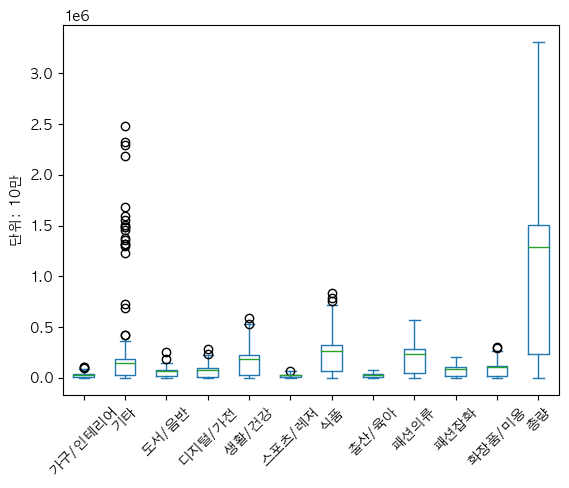

In [ ]:
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트
df.groupby("배송년월일").sum().plot.box()
plt.xticks(rotation=45)
plt.ylabel("단위: 10만")
plt.show()

In [ ]:
df[df["식품"] > 50000][["배송년월일", "구명", "식품"]]
# 식품 이상치의 경우 2월 9월 1월 연휴기간에 몰려있음

배송년월일   구명       식품
775   2021-02-01  강남구  65380.0
792   2021-02-01  송파구  57272.0
800   2021-02-02  강남구  54709.0
825   2021-02-03  강남구  51926.0
1114  2021-02-15  강남구  53621.0
1131  2021-02-15  송파구  50977.0
6364  2021-09-13  강남구  69027.0
6381  2021-09-13  송파구  61311.0
6389  2021-09-14  강남구  55422.0
15189 2022-09-01  강남구  50122.0
15289 2022-09-05  강남구  52787.0
18612 2023-01-16  강남구  65364.0
18629 2023-01-16  송파구  56113.0
18637 2023-01-17  강남구  53734.0
24729 2023-09-18  강남구  56346.0
24779 2023-09-20  강남구  50674.0

In [ ]:
# 이상치
df[df["기타"] > 50000]

배송년월일    구명  가구/인테리어        기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  \
9164 2022-01-03   강남구      0.0  172308.0    0.0     0.0    0.0     0.0  0.0   
9165 2022-01-03   강동구      0.0   99053.0    0.0     0.0    0.0     0.0  0.0   
9166 2022-01-03   강북구      0.0   55886.0    0.0     0.0    0.0     0.0  0.0   
9167 2022-01-03   강서구      0.0  137458.0    0.0     0.0    0.0     0.0  0.0   
9168 2022-01-03   관악구      0.0  114698.0    0.0     0.0    0.0     0.0  0.0   
...         ...   ...      ...       ...    ...     ...    ...     ...  ...   
9755 2022-01-26   성북구      0.0   53906.0    0.0     0.0    0.0     0.0  0.0   
9756 2022-01-26   송파구      0.0   93412.0    0.0     0.0    0.0     0.0  0.0   
9758 2022-01-26  영등포구      0.0   60639.0    0.0     0.0    0.0     0.0  0.0   
9760 2022-01-26   은평구      0.0   52638.0    0.0     0.0    0.0     0.0  0.0   
9764 2022-01-27   강남구      0.0   55917.0    0.0     0.0    0.0     0.0  0.0   

      출산/육아  패션의류  패션잡화  화장품/미용        총량  
9164    0.0   0.0   6.0     0.0  172314.0  
9165    0.0   0.0   0.0     0.0   99053.0  
9166    0.0   0.0   0.0     0.0   55886.0  
9167    0.0   0.0   0.0     0.0  137458.0  
9168    0.0   0.0   6.0     0.0  114704.0  
...     ...   ...   ...     ...       ...  
9755    0.0   0.0   0.0     0.0   53906.0  
9756    0.0   0.0   0.0     0.0   93412.0  
9758    0.0   0.0   0.0     0.0   60639.0  
9760    0.0   0.0   0.0     0.0   52638.0  
9764    0.0   0.0   0.0     0.0   55917.0  

[290 rows x 14 columns]

In [ ]:
df[df["기타"] > 50000].groupby("배송년월일").sum(numeric_only=True)

가구/인테리어         기타   도서/음반  디지털/가전   생활/건강  스포츠/레저       식품  \
배송년월일                                                                     
2022-01-03      0.0  2195739.0     0.0     0.0    12.0     0.0      0.0   
2022-01-04      0.0  1114670.0   453.0   241.0   988.0     0.0    118.0   
2022-01-05   1457.0    57776.0  3864.0  4419.0  9345.0  1118.0  11866.0   
2022-01-06      0.0   842921.0     0.0     0.0     0.0     0.0      0.0   
2022-01-07      0.0   594652.0     0.0     0.0     0.0     0.0      0.0   
2022-01-10      0.0  2144360.0     0.0     0.0     0.0     0.0      0.0   
2022-01-11      0.0  1093545.0     0.0     0.0     0.0     0.0      0.0   
2022-01-12      0.0   934154.0     0.0     0.0     0.0     0.0      0.0   
2022-01-13      0.0   918837.0     0.0     0.0     0.0     0.0      0.0   
2022-01-14      0.0   781124.0     0.0     0.0     0.0     0.0      0.0   
2022-01-17      0.0  2279805.0     0.0     0.0     0.0     0.0      0.0   
2022-01-18      0.0  1252238.0     0.0     0.0     0.0     0.0      0.0   
2022-01-19      0.0  1135668.0     0.0     0.0     0.0     0.0      0.0   
2022-01-20      0.0  1217333.0     0.0     0.0     0.0     0.0      0.0   
2022-01-21      0.0  1122436.0     0.0     0.0     0.0     0.0      0.0   
2022-01-24      0.0  2482236.0     0.0     0.0     0.0     0.0      0.0   
2022-01-25      0.0  1430923.0     0.0     0.0     0.0     0.0      0.0   
2022-01-26      0.0   851681.0     0.0     0.0     0.0     0.0      0.0   
2022-01-27      0.0    55917.0     0.0     0.0     0.0     0.0      0.0   

            출산/육아    패션의류    패션잡화  화장품/미용         총량  
배송년월일                                                 
2022-01-03    0.0     3.0    20.0     0.0  2195774.0  
2022-01-04  112.0   228.0    30.0   502.0  1117342.0  
2022-01-05  871.0  8034.0  3872.0  4872.0   107494.0  
2022-01-06    0.0     0.0     0.0     0.0   842921.0  
2022-01-07    0.0     0.0     0.0     0.0   594652.0  
2022-01-10    0.0     0.0     0.0     0.0  2144360.0  
2022-01-11    0.0     0.0     0.0     0.0  1093545.0  
2022-01-12    0.0     0.0     0.0     0.0   934154.0  
2022-01-13    0.0     0.0     0.0     0.0   918837.0  
2022-01-14    0.0     0.0     0.0     0.0   781124.0  
2022-01-17    0.0     0.0     0.0     0.0  2279805.0  
2022-01-18    0.0     0.0     0.0     0.0  1252238.0  
2022-01-19    0.0     0.0     0.0     0.0  1135668.0  
2022-01-20    0.0     0.0     0.0     0.0  1217333.0  
2022-01-21    0.0     0.0     0.0     0.0  1122436.0  
2022-01-24    0.0     0.0     0.0     0.0  2482236.0  
2022-01-25    0.0     0.0     0.0     0.0  1430923.0  
2022-01-26    0.0     0.0     0.0     0.0   851681.0  
2022-01-27    0.0     0.0     0.0     0.0    55917.0

In [ ]:
df2201 = df[df["배송년월일"].between("2022-01-01", "2022-01-31")]
df2201.groupby("배송년월일").sum(numeric_only=True)

가구/인테리어         기타    도서/음반   디지털/가전     생활/건강   스포츠/레저        식품  \
배송년월일                                                                           
2022-01-01      0.0    46479.0      0.0      0.0       0.0      0.0       0.0   
2022-01-02      0.0   205150.0      0.0      0.0       0.0      0.0       0.0   
2022-01-03      0.0  2289325.0      0.0      0.0      12.0      0.0       0.0   
2022-01-04      0.0  1483884.0    538.0    272.0    1281.0      0.0     142.0   
2022-01-05  18467.0   722315.0  40028.0  54022.0  118332.0  13830.0  157567.0   
2022-01-06      0.0  1313869.0      0.0      0.0       0.0      0.0       0.0   
2022-01-07      0.0  1226003.0      0.0      0.0       0.0      0.0       0.0   
2022-01-08      0.0   208105.0      0.0      0.0       0.0      0.0       0.0   
2022-01-09      0.0   202890.0      0.0      0.0       0.0      0.0       0.0   
2022-01-10      0.0  2187824.0      0.0      0.0       0.0      0.0       0.0   
2022-01-11      0.0  1459140.0      0.0      0.0       0.0      0.0       0.0   
2022-01-12      0.0  1375021.0      0.0      0.0       0.0      0.0       0.0   
2022-01-13      0.0  1355829.0      0.0      0.0       0.0      0.0       0.0   
2022-01-14      0.0  1294525.0      0.0      0.0       0.0      0.0       0.0   
2022-01-15      0.0   239383.0      0.0      0.0       0.0      0.0       0.0   
2022-01-16      0.0   260779.0      0.0      0.0       0.0      0.0       0.0   
2022-01-17      0.0  2325484.0      0.0      0.0       0.0      0.0       0.0   
2022-01-18      0.0  1593794.0      0.0      0.0       0.0      0.0       0.0   
2022-01-19      0.0  1509706.0      0.0      0.0       0.0      0.0       0.0   
2022-01-20      0.0  1551448.0      0.0      0.0       0.0      0.0       0.0   
2022-01-21      0.0  1487070.0      0.0      0.0       0.0      0.0       0.0   
2022-01-22      0.0   346754.0      0.0      0.0       0.0      0.0       0.0   
2022-01-23      0.0   423779.0      0.0      0.0       0.0      0.0       0.0   
2022-01-24      0.0  2482236.0      0.0      0.0       0.0      0.0       0.0   
2022-01-25      0.0  1686817.0      0.0      0.0       0.0      0.0       0.0   
2022-01-26      0.0  1319547.0      0.0      0.0       0.0      0.0       0.0   
2022-01-27      0.0   691305.0      0.0      0.0       0.0      0.0       0.0   
2022-01-28      0.0   220139.0      0.0      0.0       0.0      0.0       0.0   
2022-01-29      0.0    64561.0      0.0      0.0       0.0      0.0       0.0   
2022-01-30      0.0    35466.0      0.0      0.0       0.0      0.0       0.0   
2022-01-31      0.0     2816.0      0.0      0.0       0.0      0.0       0.0   

              출산/육아      패션의류     패션잡화   화장품/미용         총량  
배송년월일                                                       
2022-01-01      0.0       0.0      0.0      0.0    46479.0  
2022-01-02      0.0       0.0      0.0      0.0   205150.0  
2022-01-03      0.0       3.0     20.0      0.0  2289360.0  
2022-01-04    140.0     284.0     38.0    647.0  1487226.0  
2022-01-05  13561.0  114691.0  52527.0  61538.0  1366878.0  
2022-01-06      0.0       0.0      0.0      0.0  1313869.0  
2022-01-07      0.0       0.0      0.0      0.0  1226003.0  
2022-01-08      0.0       0.0      0.0      0.0   208105.0  
2022-01-09      0.0       0.0      0.0      0.0   202890.0  
2022-01-10      0.0       0.0      0.0      0.0  2187824.0  
2022-01-11      0.0       0.0      0.0      0.0  1459140.0  
2022-01-12      0.0       0.0      0.0      0.0  1375021.0  
2022-01-13      0.0       0.0      0.0      0.0  1355829.0  
2022-01-14      0.0       0.0      0.0      0.0  1294525.0  
2022-01-15      0.0       0.0      0.0      0.0   239383.0  
2022-01-16      0.0       0.0      0.0      0.0   260779.0  
2022-01-17      0.0       0.0      0.0      0.0  2325484.0  
2022-01-18      0.0       0.0      0.0      0.0  1593794.0  
2022-01-19      0.0       0.0      0.0      0.0  1509706.0  
2022-01-20      0.0       0.0      0.0      0.0  1551448.

## 이상치 제거

In [ ]:
# 데이터 변경할 범위 설정
replace = df2201.iloc[:, 2:-2]
replace

가구/인테리어      기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  출산/육아  패션의류  패션잡화
9114      0.0  4035.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9115      0.0  2052.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9116      0.0   977.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9117      0.0  2688.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9118      0.0  2005.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
...       ...     ...    ...     ...    ...     ...  ...    ...   ...   ...
9884      0.0   102.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9885      0.0    91.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9886      0.0    59.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9887      0.0    77.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0
9888      0.0   130.0    0.0     0.0    0.0     0.0  0.0    0.0   0.0   0.0

[775 rows x 10 columns]

In [ ]:
# 변경 범위 중 정상데이터 추출
df220105 = df[df["배송년월일"] == "2022-01-05"]
df220105

배송년월일    구명  가구/인테리어       기타   도서/음반  디지털/가전   생활/건강  스포츠/레저  \
9214 2022-01-05   강남구   1457.0  57776.0  3864.0  4419.0  9345.0  1118.0   
9215 2022-01-05   강동구    796.0  30337.0  1697.0  2242.0  5297.0   638.0   
9216 2022-01-05   강북구    349.0  17590.0   813.0  1068.0  2817.0   319.0   
9217 2022-01-05   강서구   1114.0  43936.0  2230.0  3056.0  7254.0   827.0   
9218 2022-01-05   관악구   1013.0  33413.0  1575.0  2531.0  5621.0   680.0   
9219 2022-01-05   광진구    623.0  25632.0  1122.0  1820.0  4032.0   453.0   
9220 2022-01-05   구로구    764.0  28696.0  1479.0  2245.0  4925.0   496.0   
9221 2022-01-05   금천구    427.0  22372.0   831.0  2174.0  3244.0   354.0   
9222 2022-01-05   노원구    682.0  27422.0  1253.0  1981.0  4707.0   515.0   
9223 2022-01-05   도봉구    427.0  18387.0   804.0  1210.0  2952.0   331.0   
9224 2022-01-05  동대문구    649.0  24339.0  1312.0  1740.0  4259.0   462.0   
9225 2022-01-05   동작구    732.0  26268.0  1442.0  1895.0  4210.0   494.0   
9226 2022-01-05   마포구    914.0  35276.0  2082.0  2629.0  5538.0   697.0   
9227 2022-01-05  서대문구    564.0  22068.0  1454.0  1656.0  3556.0   415.0   
9228 2022-01-05   서초구    935.0  39287.0  2896.0  3018.0  6459.0   777.0   
9229 2022-01-05   성동구    621.0  27800.0  1583.0  1914.0  3874.0   520.0   
9230 2022-01-05   성북구    807.0  29279.0  1973.0  2099.0  5022.0   593.0   
9231 2022-01-05   송파구   1267.0  49644.0  2381.0  3495.0  8022.0  1017.0   
9232 2022-01-05   양천구    580.0  25385.0  1755.0  1543.0  4101.0   463.0   
9233 2022-01-05  영등포구    867.0  33193.0  1965.0  2713.0  5675.0   697.0   
9234 2022-01-05   용산구    556.0  21688.0  1218.0  2460.0  3164.0   390.0   
9235 2022-01-05   은평구    842.0  27375.0  1354.0  2004.0  4869.0   582.0   
9236 2022-01-05   종로구    382.0  15390.0  1021.0  1190.0  2520.0   297.0   
9237 2022-01-05    중구    507.0  19170.0  1088.0  1490.0  2992.0   294.0   
9238 2022-01-05   중랑구    592.0  20592.0   836.0  1430.0  3877.0   401.0   

           식품   출산/육아    패션의류    패션잡화  화장품/미용        총량  
9214  11866.0   871.0  8034.0  3872.0  4872.0  107494.0  
9215   6700.0   822.0  4868.0  2199.0  2710.0   58306.0  
9216   3825.0   276.0  2774.0  1371.0  1488.0   32690.0  
9217   9341.0   865.0  6863.0  3185.0  3836.0   82507.0  
9218   8355.0   517.0  5642.0  2766.0  2987.0   65100.0  
9219   5312.0   444.0  4253.0  1993.0  2417.0   48101.0  
9220   6301.0   596.0  4377.0  1971.0  2364.0   54214.0  
9221   3859.0   319.0  3470.0  1527.0  1572.0   40149.0  
9222   6249.0   601.0  4983.0  1954.0  2351.0   52698.0  
9223   4179.0   347.0  3148.0  1273.0  1645.0   34703.0  
9224   5588.0   495.0  4705.0  1863.0  2114.0   47526.0  
9225   6486.0   502.0  4047.0  1971.0  2434.0   50481.0  
9226   7231.0   649.0  5123.0  2469.0  2934.0   65542.0  
9227   5140.0   406.0  3375.0  1626.0  1836.0   42096.0  
9228   8319.0   630.0  5200.0  2498.0  3217.0   73236.0  
9229   5028.0   434.0  5972.0  2832.0  2090.0   52668.0  
9230   6714.0   650.0  5927.0  2312.0  2556.0   57932.0  
9231  10708.0  1137.0  7283.0  3351.0  4210.0   92515.0  
9232   5713.0   466.0  3859.0  1785.0  2193.0   47843.0  
9233   7008.0   682.0  4613.0  2306.0  2668.0   62387.0  
9234   4516.0   326.0  2790.0  1440.0  2030.0   40578.0  
9235   7087.0   655.0  4593.0  1996.0  2546.0   53903.0  
9236   3440.0   186.0  2156.0   995.0  1045.0   28622.0  
9237   3728.0   232.0  2924.0  1312.0  1416.0   35153.0  
9238   4874.0   453.0  3712.0  1660.0  2007.0   40434.0

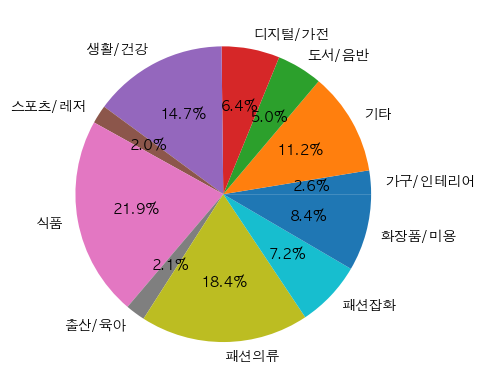

In [ ]:
# 1월을 제외한 전체 데이터 비율 확인
df[df["배송년월일"].dt.month != 1].iloc[:,2:-1].mean().plot.pie(autopct="%.1f%%")
pct = [0.026, 0.112, 0.05, 0.064, 0.147, 0.02, 0.219, 0.021, 0.184, 0.072, 0.084]

In [ ]:
# 전체 기간 품목별 비율 확인
error_idx = list(range(9114, 9889))  # 이상치가 존재하는 열
temp_df = df.drop(index=error_idx)  # 이상치를 제외하여 비율 확인을 위한 데이터 프레임 생성
temp_sum = temp_df.sum(numeric_only=True)  # 총합 데이터 생성
temp_idx = temp_df.columns[2:-1]  # 총합을 제외한 인덱스값 리스트화
rate_list = []  # 비율 리스트 생성
for idx in temp_idx:
    rate_list.append(round((temp_sum[idx]/temp_sum["총량"]), 3))
print(rate_list)
print(sum(rate_list))

[0.026, 0.112, 0.051, 0.064, 0.148, 0.02, 0.221, 0.021, 0.181, 0.072, 0.084]
1.0


In [ ]:
sum(pct)

0.9989999999999999

In [ ]:
day_sum = df2201.drop(["배송년월일", "구명", "총량"], axis=1).sum(axis=1)
day_sum

9114    4035.0
9115    2052.0
9116     977.0
9117    2688.0
9118    2005.0
         ...  
9884     102.0
9885      91.0
9886      59.0
9887      77.0
9888     130.0
Length: 775, dtype: float64

In [ ]:
# 이상치 구간 변환
column_list = replace.columns  # 반복할 품목명
pct = rate_list  # 품목별 퍼센트
oth = day_sum  # 기준이 될 기타행 데이터
count = 0
for col in column_list:
    replace[col] = oth * pct[count]
    count += 1
replace = replace.astype(int)
replace

가구/인테리어   기타  도서/음반  디지털/가전  생활/건강  스포츠/레저   식품  출산/육아  패션의류  패션잡화
9114      104  451    205     258    597      80  891     84   730   290
9115       53  229    104     131    303      41  453     43   371   147
9116       25  109     49      62    144      19  215     20   176    70
9117       69  301    137     172    397      53  594     56   486   193
9118       52  224    102     128    296      40  443     42   362   144
...       ...  ...    ...     ...    ...     ...  ...    ...   ...   ...
9884        2   11      5       6     15       2   22      2    18     7
9885        2   10      4       5     13       1   20      1    16     6
9886        1    6      3       3      8       1   13      1    10     4
9887        2    8      3       4     11       1   17      1    13     5
9888        3   14      6       8     19       2   28      2    23     9

[775 rows x 10 columns]

In [ ]:
# 원본 데이터에 적용
df.iloc[9114:9889, 2:-2] = replace
df.iloc[9114:9888, 2:-2]

가구/인테리어     기타  도서/음반  디지털/가전  생활/건강  스포츠/레저     식품  출산/육아   패션의류   패션잡화
9114    104.0  451.0  205.0   258.0  597.0    80.0  891.0   84.0  730.0  290.0
9115     53.0  229.0  104.0   131.0  303.0    41.0  453.0   43.0  371.0  147.0
9116     25.0  109.0   49.0    62.0  144.0    19.0  215.0   20.0  176.0   70.0
9117     69.0  301.0  137.0   172.0  397.0    53.0  594.0   56.0  486.0  193.0
9118     52.0  224.0  102.0   128.0  296.0    40.0  443.0   42.0  362.0  144.0
...       ...    ...    ...     ...    ...     ...    ...    ...    ...    ...
9883      2.0   12.0    5.0     7.0   16.0     2.0   24.0    2.0   20.0    8.0
9884      2.0   11.0    5.0     6.0   15.0     2.0   22.0    2.0   18.0    7.0
9885      2.0   10.0    4.0     5.0   13.0     1.0   20.0    1.0   16.0    6.0
9886      1.0    6.0    3.0     3.0    8.0     1.0   13.0    1.0   10.0    4.0
9887      2.0    8.0    3.0     4.0   11.0     1.0   17.0    1.0   13.0    5.0

[774 rows x 10 columns]

In [ ]:
# 기존 정상 데이터 재적용
df.iloc[9214:9239,:] = df220105
df.iloc[9214:9239,:]

배송년월일    구명  가구/인테리어       기타   도서/음반  디지털/가전   생활/건강  스포츠/레저  \
9214 2022-01-05   강남구   1457.0  57776.0  3864.0  4419.0  9345.0  1118.0   
9215 2022-01-05   강동구    796.0  30337.0  1697.0  2242.0  5297.0   638.0   
9216 2022-01-05   강북구    349.0  17590.0   813.0  1068.0  2817.0   319.0   
9217 2022-01-05   강서구   1114.0  43936.0  2230.0  3056.0  7254.0   827.0   
9218 2022-01-05   관악구   1013.0  33413.0  1575.0  2531.0  5621.0   680.0   
9219 2022-01-05   광진구    623.0  25632.0  1122.0  1820.0  4032.0   453.0   
9220 2022-01-05   구로구    764.0  28696.0  1479.0  2245.0  4925.0   496.0   
9221 2022-01-05   금천구    427.0  22372.0   831.0  2174.0  3244.0   354.0   
9222 2022-01-05   노원구    682.0  27422.0  1253.0  1981.0  4707.0   515.0   
9223 2022-01-05   도봉구    427.0  18387.0   804.0  1210.0  2952.0   331.0   
9224 2022-01-05  동대문구    649.0  24339.0  1312.0  1740.0  4259.0   462.0   
9225 2022-01-05   동작구    732.0  26268.0  1442.0  1895.0  4210.0   494.0   
9226 2022-01-05   마포구    914.0  35276.0  2082.0  2629.0  5538.0   697.0   
9227 2022-01-05  서대문구    564.0  22068.0  1454.0  1656.0  3556.0   415.0   
9228 2022-01-05   서초구    935.0  39287.0  2896.0  3018.0  6459.0   777.0   
9229 2022-01-05   성동구    621.0  27800.0  1583.0  1914.0  3874.0   520.0   
9230 2022-01-05   성북구    807.0  29279.0  1973.0  2099.0  5022.0   593.0   
9231 2022-01-05   송파구   1267.0  49644.0  2381.0  3495.0  8022.0  1017.0   
9232 2022-01-05   양천구    580.0  25385.0  1755.0  1543.0  4101.0   463.0   
9233 2022-01-05  영등포구    867.0  33193.0  1965.0  2713.0  5675.0   697.0   
9234 2022-01-05   용산구    556.0  21688.0  1218.0  2460.0  3164.0   390.0   
9235 2022-01-05   은평구    842.0  27375.0  1354.0  2004.0  4869.0   582.0   
9236 2022-01-05   종로구    382.0  15390.0  1021.0  1190.0  2520.0   297.0   
9237 2022-01-05    중구    507.0  19170.0  1088.0  1490.0  2992.0   294.0   
9238 2022-01-05   중랑구    592.0  20592.0   836.0  1430.0  3877.0   401.0   

           식품   출산/육아    패션의류    패션잡화  화장품/미용        총량  
9214  11866.0   871.0  8034.0  3872.0  4872.0  107494.0  
9215   6700.0   822.0  4868.0  2199.0  2710.0   58306.0  
9216   3825.0   276.0  2774.0  1371.0  1488.0   32690.0  
9217   9341.0   865.0  6863.0  3185.0  3836.0   82507.0  
9218   8355.0   517.0  5642.0  2766.0  2987.0   65100.0  
9219   5312.0   444.0  4253.0  1993.0  2417.0   48101.0  
9220   6301.0   596.0  4377.0  1971.0  2364.0   54214.0  
9221   3859.0   319.0  3470.0  1527.0  1572.0   40149.0  
9222   6249.0   601.0  4983.0  1954.0  2351.0   52698.0  
9223   4179.0   347.0  3148.0  1273.0  1645.0   34703.0  
9224   5588.0   495.0  4705.0  1863.0  2114.0   47526.0  
9225   6486.0   502.0  4047.0  1971.0  2434.0   50481.0  
9226   7231.0   649.0  5123.0  2469.0  2934.0   65542.0  
9227   5140.0   406.0  3375.0  1626.0  1836.0   42096.0  
9228   8319.0   630.0  5200.0  2498.0  3217.0   73236.0  
9229   5028.0   434.0  5972.0  2832.0  2090.0   52668.0  
9230   6714.0   650.0  5927.0  2312.0  2556.0   57932.0  
9231  10708.0  1137.0  7283.0  3351.0  4210.0   92515.0  
9232   5713.0   466.0  3859.0  1785.0  2193.0   47843.0  
9233   7008.0   682.0  4613.0  2306.0  2668.0   62387.0  
9234   4516.0   326.0  2790.0  1440.0  2030.0   40578.0  
9235   7087.0   655.0  4593.0  1996.0  2546.0   53903.0  
9236   3440.0   186.0  2156.0   995.0  1045.0   28622.0  
9237   3728.0   232.0  2924.0  1312.0  1416.0   35153.0  
9238   4874.0   453.0  3712.0  1660.0  2007.0   40434.0

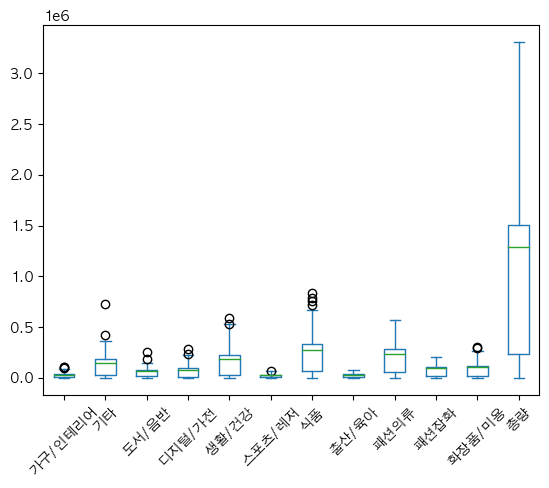

In [ ]:
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트
df.groupby("배송년월일").sum().plot.box()
plt.xticks(rotation=45)
plt.show()

# 데이터 분석

## 구별 전체 택배량 시각화

In [ ]:
import folium
import json
from folium.features import DivIcon

In [ ]:
df.groupby("구명").sum(numeric_only=True)

가구/인테리어          기타      도서/음반     디지털/가전       생활/건강     스포츠/레저  \
구명                                                                         
강남구   2279357.0  11215107.0  5234982.0  5567876.0  13353675.0  1789511.0   
강동구   1221330.0   4856779.0  2199148.0  2837748.0   6944727.0   961934.0   
강북구    664749.0   2724927.0  1075818.0  1566451.0   3918189.0   501389.0   
강서구   1712049.0   7060038.0  3153663.0  4196520.0   9887857.0  1333148.0   
관악구   1494744.0   5426535.0  2253430.0  3397357.0   7563405.0   996466.0   
광진구   1058130.0   4356041.0  1739101.0  2504160.0   5714160.0   784990.0   
구로구   1088237.0   4597695.0  2077278.0  2932368.0   6612404.0   852450.0   
금천구    740950.0   3814948.0  1256279.0  2520328.0   4381434.0   638167.0   
노원구   1210348.0   4824123.0  2241615.0  2864555.0   7171331.0   945072.0   
도봉구    719900.0   2804153.0  1157826.0  1711442.0   4227550.0   541647.0   
동대문구   980233.0   4338735.0  1798300.0  2264873.0   5469316.0   718268.0   
동작구   1095283.0   4291222.0  2127606.0  2506126.0   5991026.0   808756.0   
마포구   1453223.0   6087171.0  2956096.0  3395600.0   7781334.0  1031130.0   
서대문구   923108.0   3781094.0  1996246.0  2148944.0   5141345.0   675961.0   
서초구   1521770.0   6881820.0  3589126.0  3770073.0   8635583.0  1231520.0   
성동구    948519.0   5719450.0  2319968.0  2377720.0   5517362.0   813021.0   
성북구   1177634.0   5228429.0  2367261.0  2714288.0   6691219.0   861311.0   
송파구   2003529.0   8557198.0  3891027.0  4824333.0  11567553.0  1656876.0   
양천구   1064073.0   4645987.0  2368655.0  2559985.0   6410282.0   875222.0   
영등포구  1305329.0   5745758.0  2667672.0  3429396.0   7389988.0  1030393.0   
용산구    832133.0   3715444.0  1542302.0  3227081.0   4660667.0   630769.0   
은평구   1166668.0   4532538.0  1949494.0  2638426.0   6718565.0   898410.0   
종로구    594534.0   2825796.0  1478520.0  1445872.0   3437592.0   431349.0   
중구     651834.0   3981389.0  1611506.0  1731257.0   4030497.0   501068.0   
중랑구    936736.0   3905630.0  1297699.0  2102169.0   5316020.0   705663.0   

              식품      출산/육아        패션의류       패션잡화     화장품/미용          총량  
구명                                                                         
강남구   18918249.0  1521346.0  14220731.0  5721318.0  7210511.0  87240594.0  
강동구   10565551.0  1250579.0   8182115.0  3456181.0  3843670.0  46430394.0  
강북구    6253587.0   511752.0   5110176.0  1888717.0  2170607.0  26448583.0  
강서구   14410493.0  1533072.0  12373532.0  4569676.0  5741683.0  66124239.0  
관악구   11984274.0   908977.0   9965549.0  3835698.0  4666102.0  52613176.0  
광진구    8454835.0   757606.0   7416505.0  2918410.0  3334542.0  39129137.0  
구로구    9744621.0  1067459.0   7572984.0  2862645.0  3483555.0  42994559.0  
금천구    5978597.0   581477.0   6316923.0  2554649.0  2296222.0  31152520.0  
노원구   11057405.0  1118660.0   8884725.0  3287878.0  3881833.0  47589289.0  
도봉구    6698524.0   601810.0   5220193.0  1939601.0  2332053.0  28021867.0  
동대문구   8185486.0   817240.0   7554810.0  2818655.0  3164395.0  38197266.0  
동작구    9541200.0   909258.0   7477874.0  2963701.0  3573451.0  41382774.0  
마포구   11024717.0  1076570.0   8757661.0  3656516.0  4058402.0  51400184.0  
서대문구   7876526.0   780671.0   6246613.0  2533782.0  2807769.0  34992510.0  
서초구   13227103.0  1215817.0   9218652.0  3762650.0  4703631.0  57900322.0  
성동구    7970758.0   890744.0   9536600.0  4150161.0  2940446.0  43285583.0  
성북구   10219560.0  1071347.0   9875011.0  3485746.0  3859893.0  47659923.0  
송파구   17415141.0  1851789.0  13423392.0  5402680.0  6630930.0  77405702.0  
양천구    9887265.0   996780.0   7565367.0  3025191.0  3563799.0  43056409.0  
영등포구  10932733.0  1150599.0   7992084.0  3389683.0  4117162.0  49269902.0  
용산구    7110999.0   612168.0   5105649.0  2091054.0  2490962.0  32095895.0  
은평구   10491993.0  1021503.0   7841555.0  3105770.0  3692097.0  44161714.0  
종로구    5120963.0   361676.0   3863754.0  1571175.0  1578830.0  22763780.0  
중구     5395736.0   436779.0   5143254.0  2148489.0  198

In [ ]:
# 일간 택배 수령량 평균
map_df = df.groupby("구명")["총량"].mean(numeric_only=True)
map_df

구명
강남구     86979.655035
강동구     46291.519442
강북구     26422.160839
강서구     65926.459621
관악구     52455.808574
광진구     39051.034930
구로구     42908.741517
금천구     31059.341974
노원구     47541.747253
도봉구     27938.052841
동대문구    38121.023952
동작구     41341.432567
마포구     51297.588822
서대문구    34957.552448
서초구     57784.752495
성동구     43199.184631
성북구     47517.370887
송파구     77174.179462
양천구     42927.626122
영등포구    49122.534397
용산구     32031.831337
은평구     44073.566866
종로구     22763.780000
중구      27623.931138
중랑구     35355.990020
Name: 총량, dtype: float64

In [ ]:
seoul_geo = json.load(open("seoul_municipalities_geo.json", encoding="utf-8")) #========================================================================================= 파일

In [ ]:
# 새 데이터프레임으로 변경
map_df = map_df.to_frame(name="일평균")
map_df = map_df.reset_index()
map_df

구명           일평균
0    강남구  86979.655035
1    강동구  46291.519442
2    강북구  26422.160839
3    강서구  65926.459621
4    관악구  52455.808574
5    광진구  39051.034930
6    구로구  42908.741517
7    금천구  31059.341974
8    노원구  47541.747253
9    도봉구  27938.052841
10  동대문구  38121.023952
11   동작구  41341.432567
12   마포구  51297.588822
13  서대문구  34957.552448
14   서초구  57784.752495
15   성동구  43199.184631
16   성북구  47517.370887
17   송파구  77174.179462
18   양천구  42927.626122
19  영등포구  49122.534397
20   용산구  32031.831337
21   은평구  44073.566866
22   종로구  22763.780000
23    중구  27623.931138
24   중랑구  35355.990020

In [ ]:
# 총량값 정수로 변환
map_df["일평균"] = map_df["일평균"].astype(int)
map_df

구명    일평균
0    강남구  86979
1    강동구  46291
2    강북구  26422
3    강서구  65926
4    관악구  52455
5    광진구  39051
6    구로구  42908
7    금천구  31059
8    노원구  47541
9    도봉구  27938
10  동대문구  38121
11   동작구  41341
12   마포구  51297
13  서대문구  34957
14   서초구  57784
15   성동구  43199
16   성북구  47517
17   송파구  77174
18   양천구  42927
19  영등포구  49122
20   용산구  32031
21   은평구  44073
22   종로구  22763
23    중구  27623
24   중랑구  35355

In [ ]:
map_df.sort_values(by="일평균", ascending=False, inplace=True)

In [ ]:
# 서울 자치구 좌표 지정
locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

In [ ]:
# 지도 생성
seoul_map = folium.Map(location=[37.56, 126.97], zoom_start=12)

In [ ]:
# 지도에 구 이름 텍스트 생성
for key, value in locs.items():
    folium.map.Marker([value[0], value[1]], icon=DivIcon(icon_size=(0, 0), icon_anchor=(0, 0), html='<div\
                    style="\
                        font-size: 2rem;\
                        color: black;\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key + '</b></div>')).add_to(seoul_map)

In [ ]:
# 지도에 데이터 작성
folium.Choropleth(geo_data=seoul_geo,
    data=map_df,
    columns=['구명', '일평균'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='일간 평균 택배 수령량').add_to(seoul_map)


In [ ]:
# 지도 표시

seoul_map

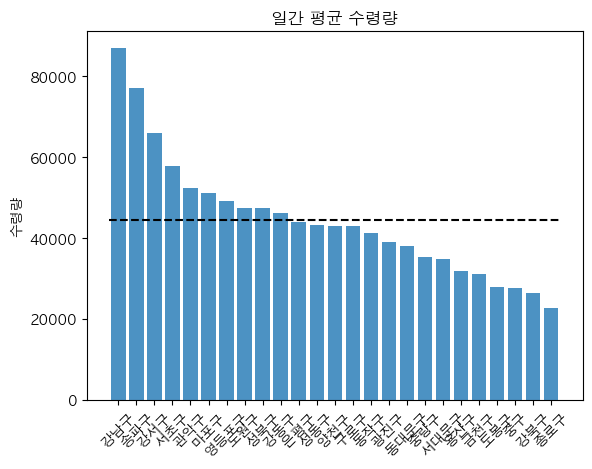

In [ ]:
gu_df = map_df.set_index("구명")["일평균"]
index = np.arange(25)
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트

plt.bar(index, gu_df, alpha=0.8)
plt.plot([-0.5, 24.5], [gu_df.mean(), gu_df.mean()], "k--")
plt.title("일간 평균 수령량")
plt.ylabel("수령량")
plt.xticks(index, gu_df.index, rotation=45)

plt.savefig("bar.png")  # ====================================================================================================  그래프 이미지로 저장
plt.show()

## 강남구 택배품목 시각화

In [ ]:
gn_df = df[df["구명"] == "강남구"].drop("총량", axis=1).mean(numeric_only=True).sort_values(ascending=False)

In [ ]:
gn_df = gn_df.reindex(["식품", "패션의류", "생활/건강", "화장품/미용", "패션잡화", "디지털/가전", "도서/음반", "가구/인테리어", "스포츠/레저", "출산/육아", "기타"])

In [ ]:
gn_df

식품         18861.664008
패션의류       14178.196411
생활/건강      13313.733799
화장품/미용      7188.944167
패션잡화        5704.205384
디지털/가전      5551.222333
도서/음반       5219.324028
가구/인테리어     2272.539382
스포츠/레저      1784.158524
출산/육아       1516.795613
기타         11181.562313
dtype: float64

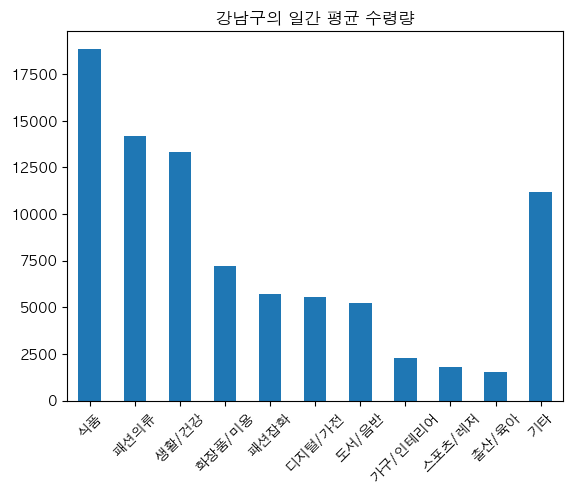

In [ ]:
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트


gn_df.plot.bar(rot=45)
plt.title("강남구의 일간 평균 수령량")
plt.show()

Text(0.5, 1.0, '강남구의 택배 품목 비율')

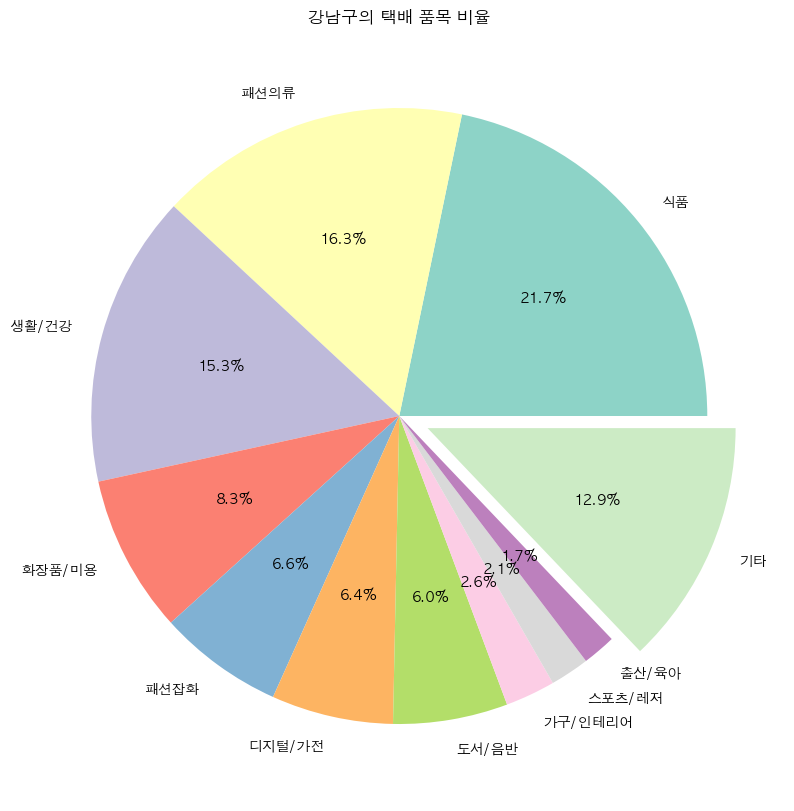

In [ ]:
plt.figure(figsize=(10, 10))

data = gn_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gn_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("강남구의 택배 품목 비율")

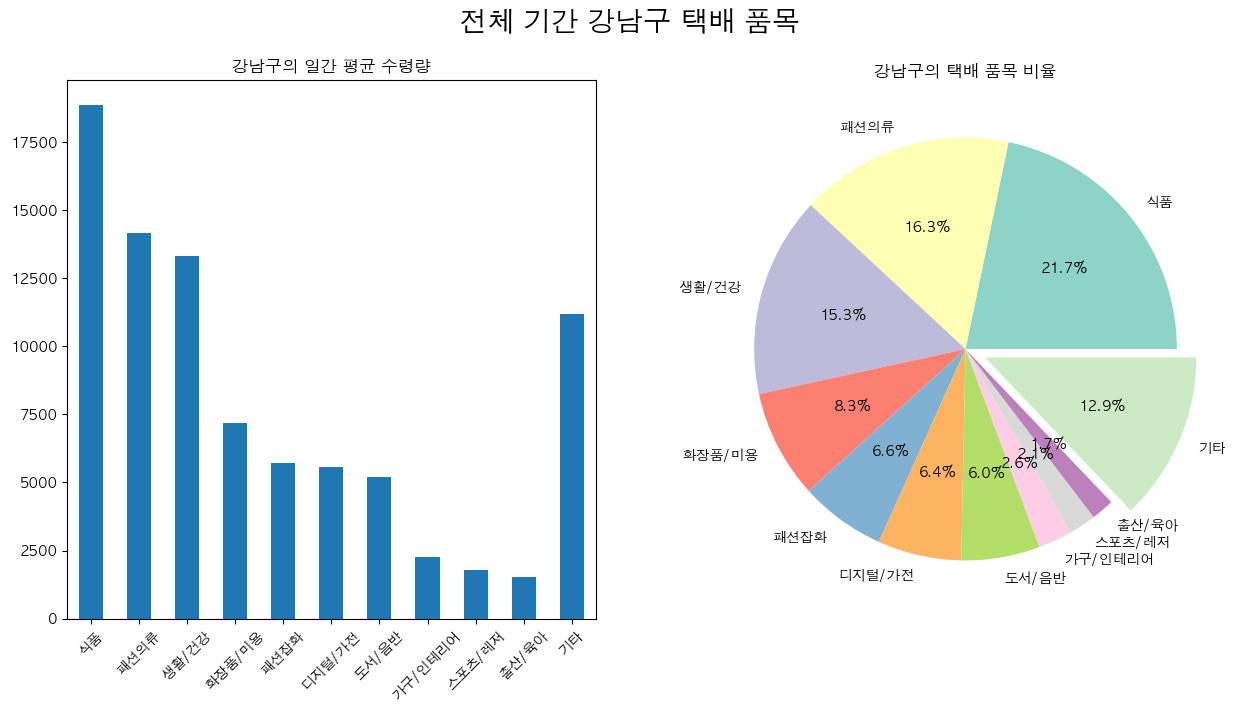

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.rc('font',family = 'AppleGothic') # ========================================================================================================================= 폰트

fig.suptitle("전체 기간 강남구 택배 품목", fontweight="bold", fontsize=20)

fig.add_subplot(1, 2, 1)

gn_df.plot.bar(rot=45)
plt.title("강남구의 일간 평균 수령량")

# -----------------------------------

fig.add_subplot(1, 2, 2)

data = gn_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gn_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("강남구의 택배 품목 비율")

fig.savefig("gangnam.png")
plt.show()


In [ ]:
def gu_graph(name):  # name > 구를 제외한 구 이름 입력 / ex) 강남구 > 강남

    gu_df = df[df["구명"] == f"{name}구"].drop("총량", axis=1).sum(numeric_only=True).sort_values(ascending=False)
    gu_df = gu_df.reindex(["식품", "패션의류", "생활/건강", "화장품/미용", "패션잡화", "디지털/가전", "도서/음반", "가구/인테리어", "스포츠/레저", "출산/육아", "기타"])  # 인덱스가 고정됨.. 정렬후 기타를 맨뒤로 보낼 방법?

    fig = plt.figure(figsize=(15, 7))
    plt.rc('font',family = 'AppleGothic') # =========================================================================================================================  폰트

    fig.suptitle(f"전체 기간 {name}구 택배 품목", fontweight="bold", fontsize=20)

    fig.add_subplot(1, 2, 1)

    gu_df.plot.bar(rot=45)
    plt.title(f"전체 기간 {name}구의 택배 품목 그래프")
    plt.ylabel("단위: 천만")

    # -----------------------------------

    fig.add_subplot(1, 2, 2)

    data = gu_df.values
    colors = sns.color_palette("Set3")[0:len(data)]
    exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

    gu_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
    plt.title(f"전체 기간 {name}구의 택배 품목 비율")

    fig.savefig(f"{name} 택배 품목.png")
    plt.show()


## 송파구 택배 품목 시각화

In [ ]:
sp_df = df[df["구명"] == "송파구"].drop("총량", axis=1).mean(numeric_only=True).sort_values(ascending=False)
sp_df

식품         17363.051844
패션의류       13383.242273
생활/건강      11532.954138
기타          8531.603190
화장품/미용      6611.096710
패션잡화        5386.520439
디지털/가전      4809.903290
도서/음반       3879.388833
가구/인테리어     1997.536391
출산/육아       1846.250249
스포츠/레저      1651.920239
dtype: float64

In [ ]:
sp_df = sp_df.reindex(["식품", "패션의류", "생활/건강", "화장품/미용", "패션잡화", "디지털/가전", "도서/음반", "가구/인테리어", "출산/육아", "스포츠/레저", "기타"])
sp_df

식품         17363.051844
패션의류       13383.242273
생활/건강      11532.954138
화장품/미용      6611.096710
패션잡화        5386.520439
디지털/가전      4809.903290
도서/음반       3879.388833
가구/인테리어     1997.536391
출산/육아       1846.250249
스포츠/레저      1651.920239
기타          8531.603190
dtype: float64

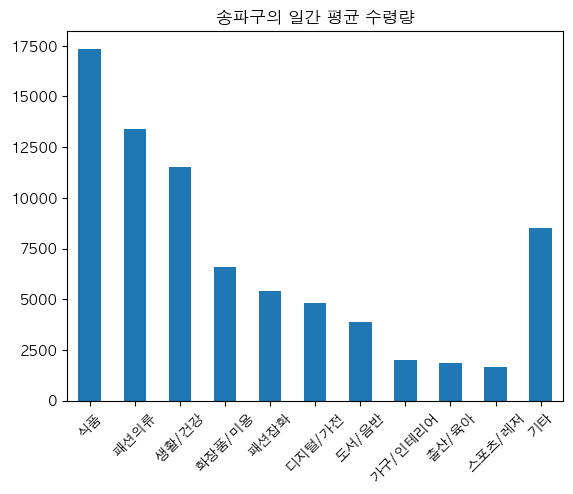

In [ ]:
sp_df.plot.bar(rot=45)
plt.title("송파구의 일간 평균 수령량")
plt.show()

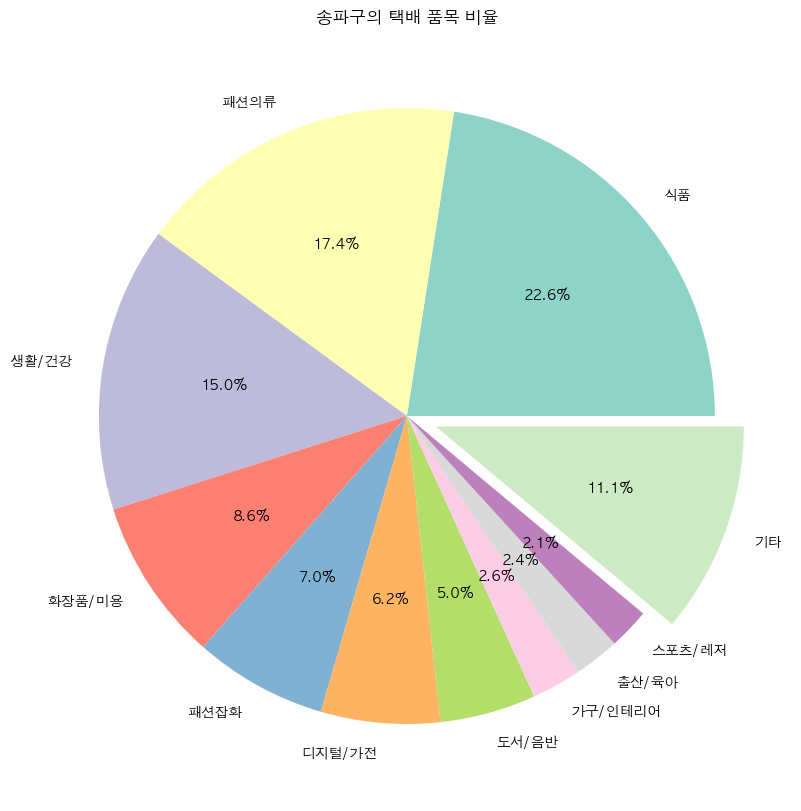

In [ ]:
plt.figure(figsize=(10, 10))

data = sp_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sp_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("송파구의 택배 품목 비율")
plt.show()

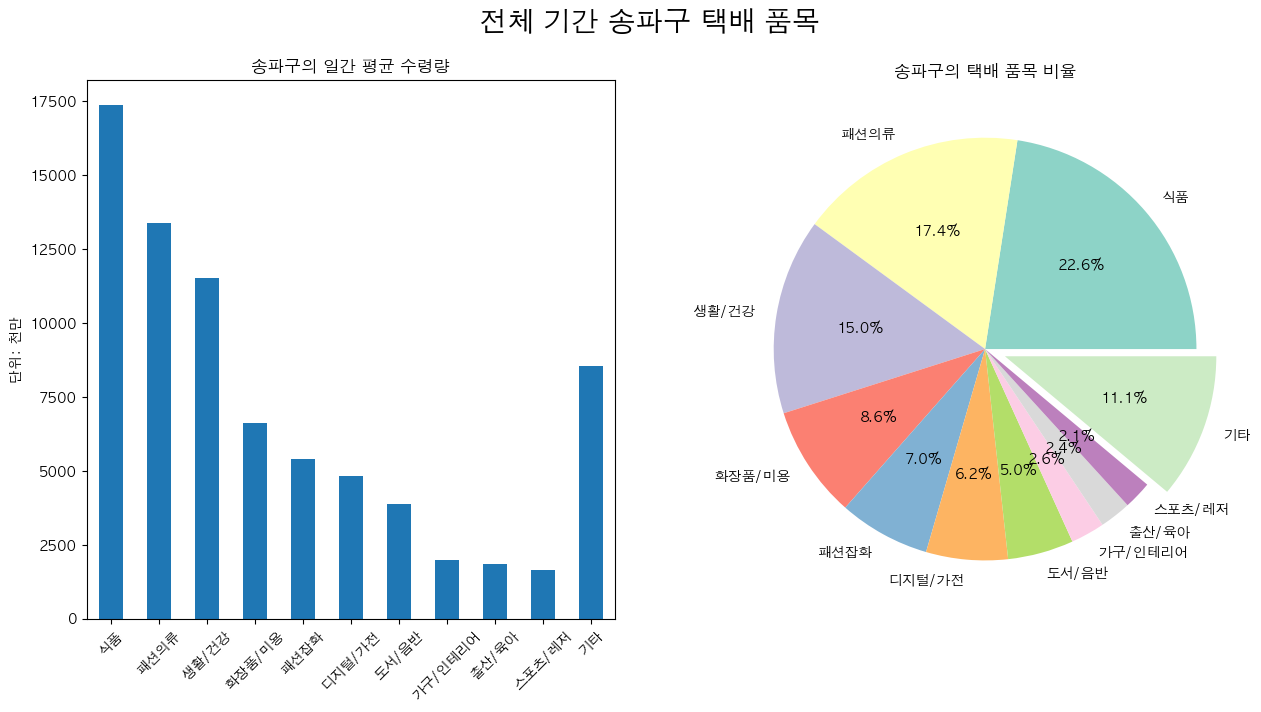

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================

fig.suptitle("전체 기간 송파구 택배 품목", fontweight="bold", fontsize=20)

fig.add_subplot(1, 2, 1)

sp_df.plot.bar(rot=45)
plt.title("송파구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# -----------------------------------

fig.add_subplot(1, 2, 2)

data = sp_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sp_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("송파구의 택배 품목 비율")

fig.savefig("songpa.png")
plt.show()

## 강서구 택배 품목 시각화

In [ ]:
gs_df = df[df["구명"] == "강서구"].drop("총량", axis=1).mean(numeric_only=True).sort_values(ascending=False)
gs_df

식품         14367.390828
패션의류       12336.522433
생활/건강       9858.282154
기타          7038.921236
화장품/미용      5724.509472
패션잡화        4556.007976
디지털/가전      4183.968096
도서/음반       3144.230309
가구/인테리어     1706.928215
출산/육아       1528.486540
스포츠/레저      1329.160518
dtype: float64

In [ ]:
gs_df = gs_df.reindex(["식품", "패션의류", "생활/건강", "화장품/미용", "패션잡화", "디지털/가전", "도서/음반", "가구/인테리어", "출산/육아", "스포츠/레저", "기타"])
gs_df

식품         14367.390828
패션의류       12336.522433
생활/건강       9858.282154
화장품/미용      5724.509472
패션잡화        4556.007976
디지털/가전      4183.968096
도서/음반       3144.230309
가구/인테리어     1706.928215
출산/육아       1528.486540
스포츠/레저      1329.160518
기타          7038.921236
dtype: float64

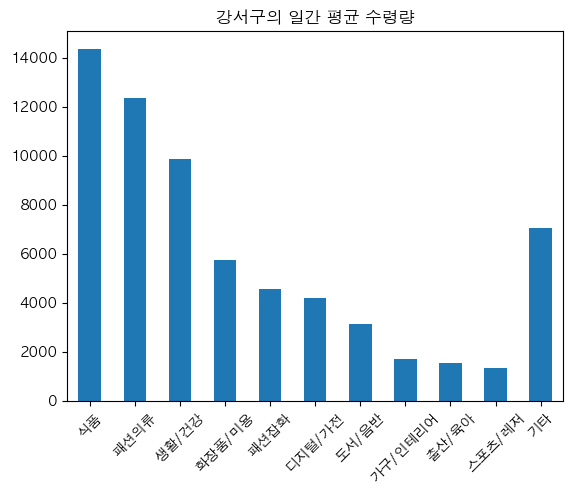

In [ ]:
gs_df.plot.bar(rot=45)
plt.title("강서구의 일간 평균 수령량")
plt.show()

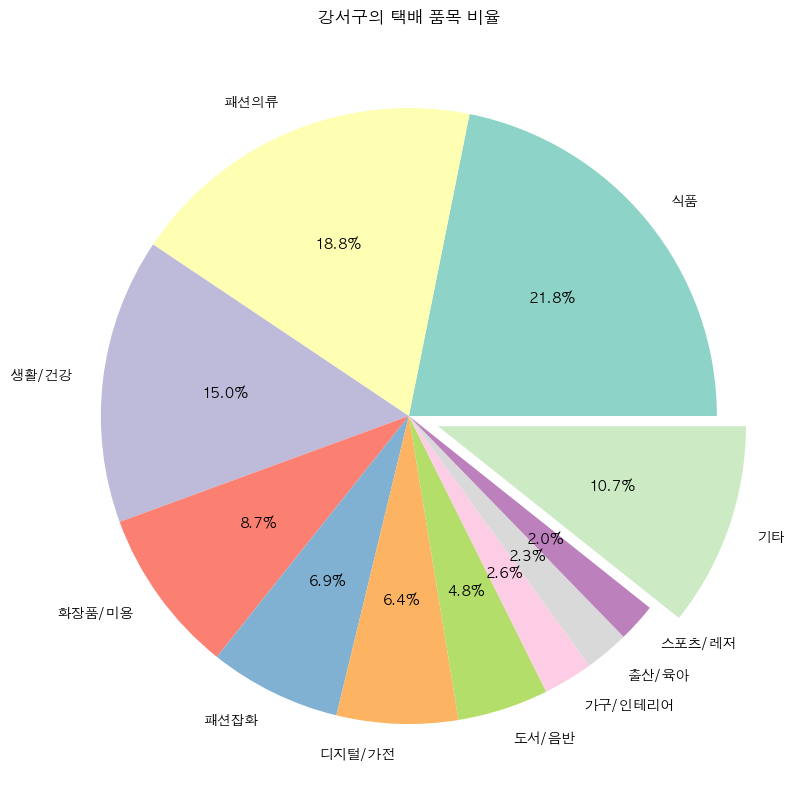

In [ ]:
plt.figure(figsize=(10, 10))

data = gs_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gs_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("강서구의 택배 품목 비율")
plt.show()

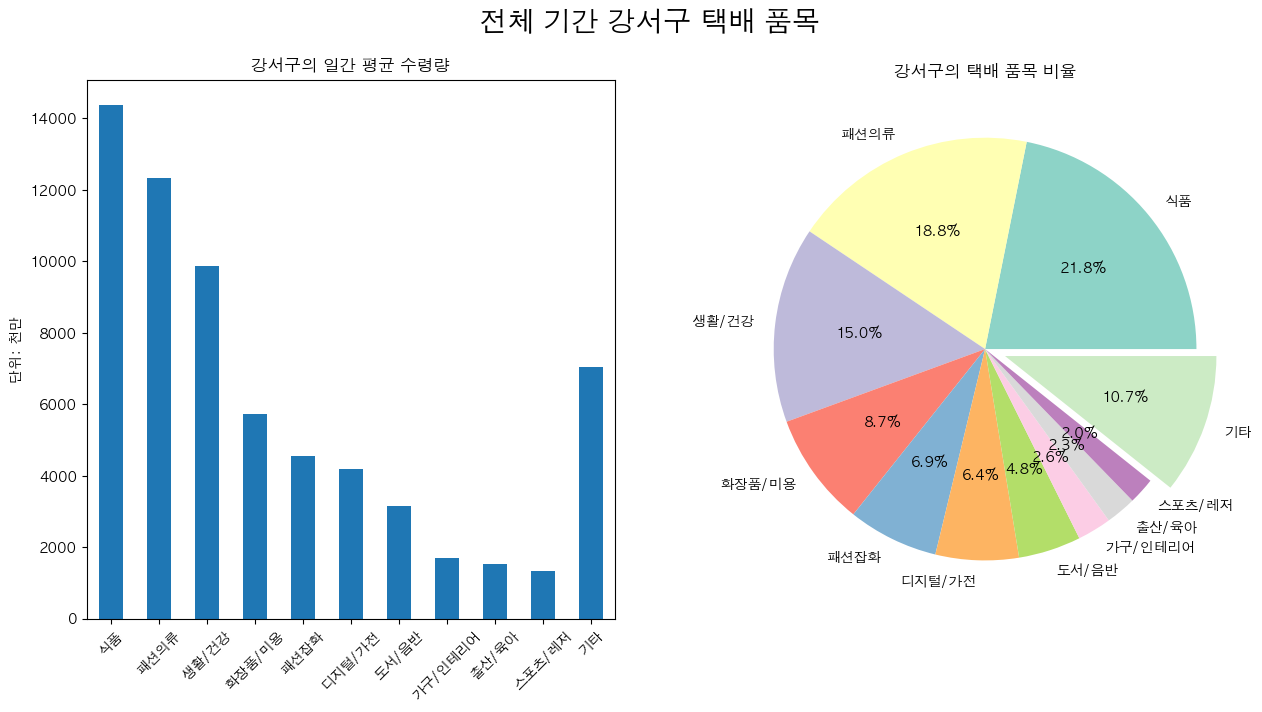

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================

fig.suptitle("전체 기간 강서구 택배 품목", fontweight="bold", fontsize=20)

fig.add_subplot(1, 2, 1)

gs_df.plot.bar(rot=45)
plt.title("강서구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# -----------------------------------

fig.add_subplot(1, 2, 2)

data = gs_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gs_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("강서구의 택배 품목 비율")

fig.savefig("gangseo.png")
plt.show()

## 서초구 택배품목 시각화

In [ ]:
sc_df = df[df["구명"] == "서초구"].drop("총량", axis=1).mean(numeric_only=True).sort_values(ascending=False)
sc_df

식품         13200.701597
패션의류        9200.251497
생활/건강       8618.346307
기타          6868.083832
화장품/미용      4694.242515
디지털/가전      3762.547904
패션잡화        3755.139721
도서/음반       3581.962076
가구/인테리어     1518.732535
스포츠/레저      1229.061876
출산/육아       1213.390220
dtype: float64

In [ ]:
sc_df = sc_df.reindex(["식품", "패션의류", "생활/건강", "화장품/미용", "디지털/가전", "패션잡화", "도서/음반", "가구/인테리어", "스포츠/레저", "출산/육아", "기타"])
sc_df

식품         13200.701597
패션의류        9200.251497
생활/건강       8618.346307
화장품/미용      4694.242515
디지털/가전      3762.547904
패션잡화        3755.139721
도서/음반       3581.962076
가구/인테리어     1518.732535
스포츠/레저      1229.061876
출산/육아       1213.390220
기타          6868.083832
dtype: float64

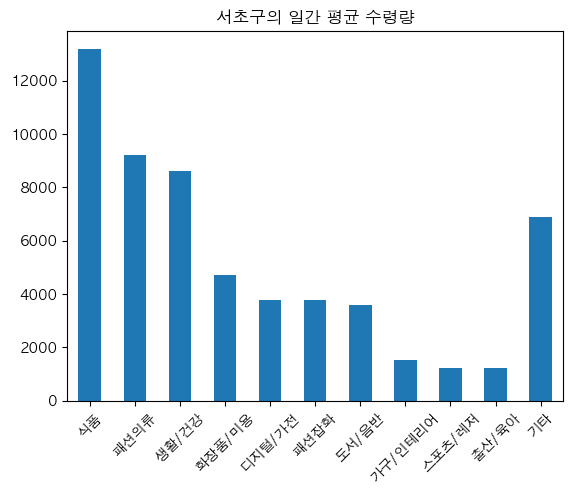

In [ ]:
sc_df.plot.bar(rot=45)
plt.title("서초구의 일간 평균 수령량")
plt.show()

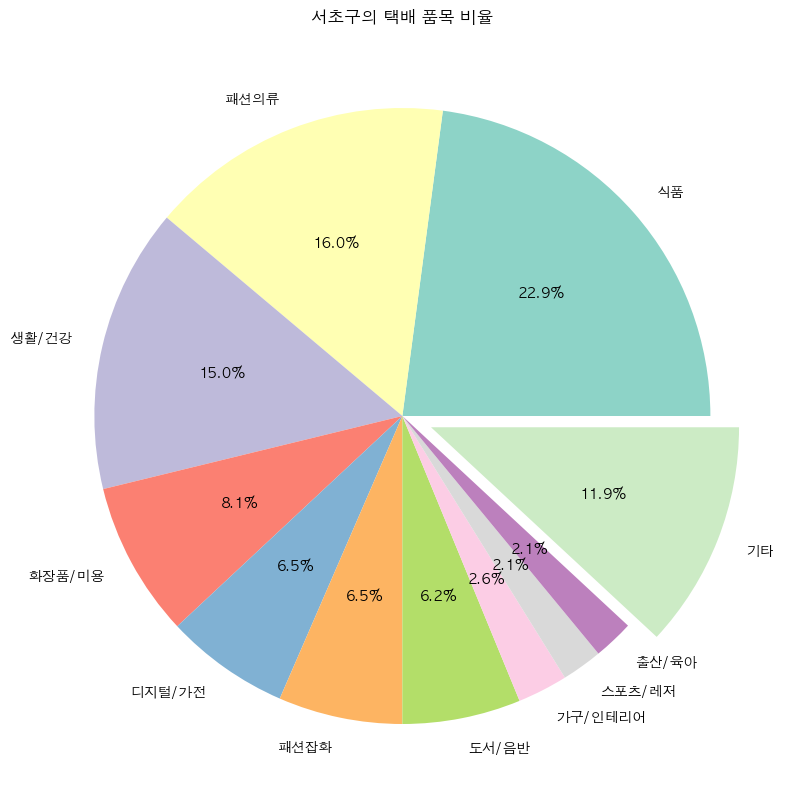

In [ ]:
plt.figure(figsize=(10, 10))

data = sc_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sc_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("서초구의 택배 품목 비율")
plt.show()

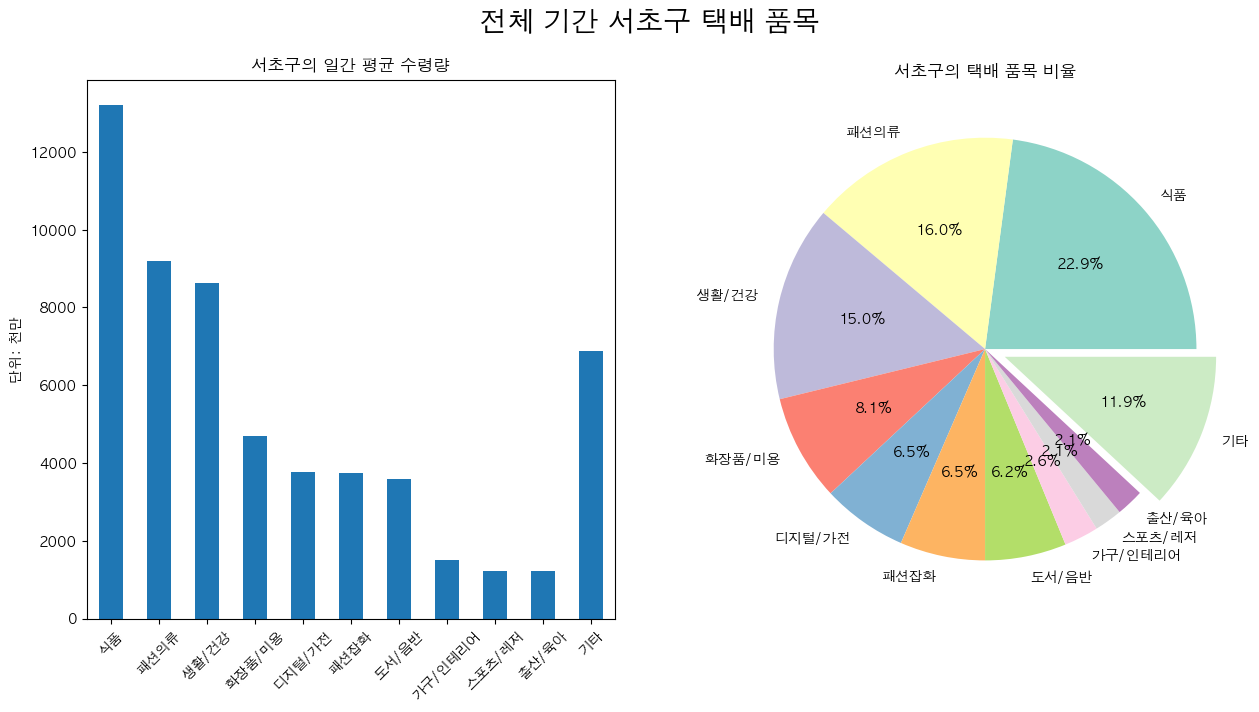

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================

fig.suptitle("전체 기간 서초구 택배 품목", fontweight="bold", fontsize=20)

fig.add_subplot(1, 2, 1)

sc_df.plot.bar(rot=45)
plt.title("서초구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# -----------------------------------

fig.add_subplot(1, 2, 2)

data = sc_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sc_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("서초구의 택배 품목 비율")

fig.savefig("seocho.png")
plt.show()


## 4개구 전체 데이터 통합 시각화

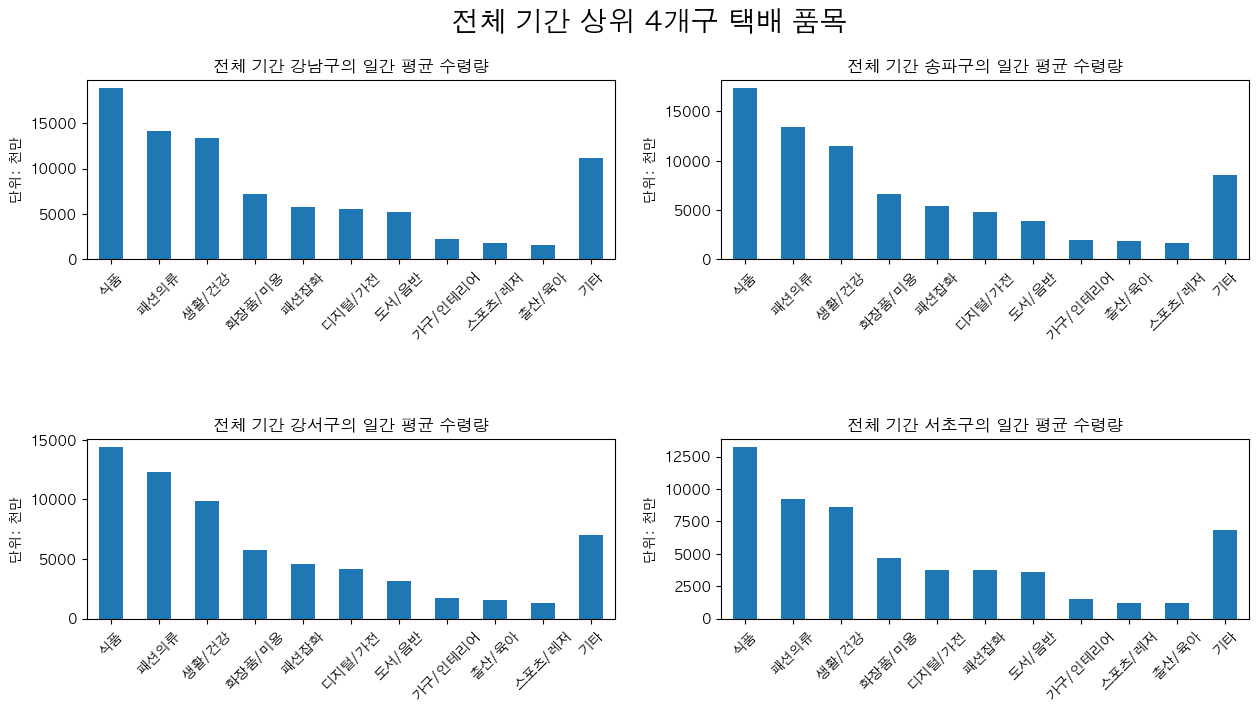

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.rc('font',family = 'AppleGothic') # ========================================================================================================================= 폰트

fig.suptitle("전체 기간 상위 4개구 택배 품목", fontweight="bold", fontsize=20)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)

# 강남구 그래프
fig.add_subplot(2, 2, 1)

gn_df.plot.bar(rot=45)
plt.title("전체 기간 강남구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# 송파구 그래프
fig.add_subplot(2, 2, 2)

sp_df.plot.bar(rot=45)
plt.title("전체 기간 송파구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# 강서구 그래프
fig.add_subplot(2, 2, 3)

gs_df.plot.bar(rot=45)
plt.title("전체 기간 강서구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

# 서초구 그래프
fig.add_subplot(2, 2, 4)

sc_df.plot.bar(rot=45)
plt.title("전체 기간 서초구의 일간 평균 수령량")
plt.ylabel("단위: 천만")

fig.savefig("allbar.png")
plt.show()

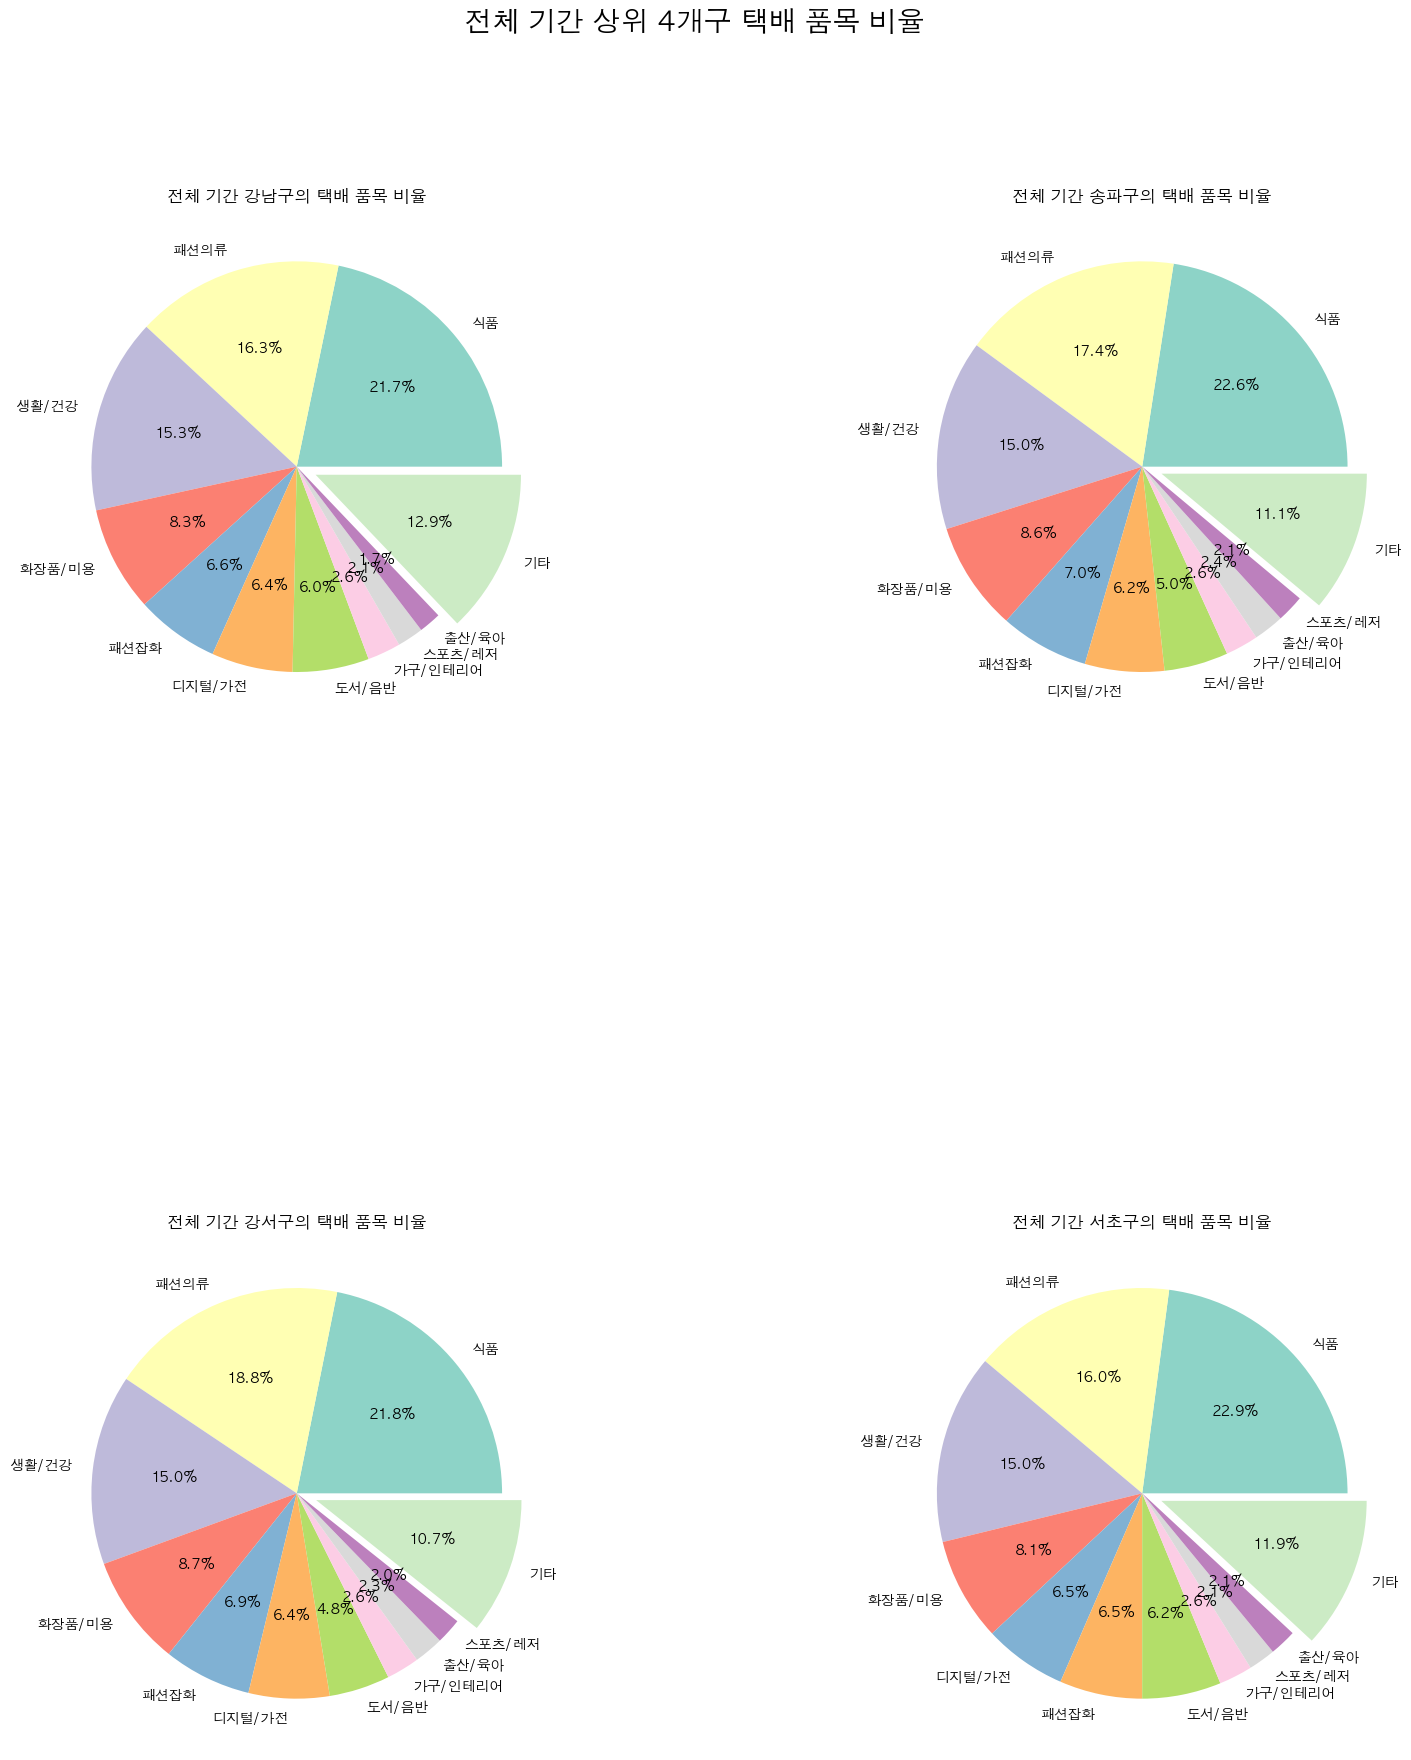

In [ ]:
fig = plt.figure(figsize=(20, 20))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================

fig.suptitle("전체 기간 상위 4개구 택배 품목 비율", fontweight="bold", fontsize=20)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)

# 강남구 그래프
fig.add_subplot(2, 2, 1)

data = gn_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gn_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("전체 기간 강남구의 택배 품목 비율")

# 송파구 그래프
fig.add_subplot(2, 2, 2)

data = sp_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sp_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("전체 기간 송파구의 택배 품목 비율")

# 강서구 그래프
fig.add_subplot(2, 2, 3)

data = gs_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

gs_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("전체 기간 강서구의 택배 품목 비율")

# 서초구 그래프
fig.add_subplot(2, 2, 4)

data = sc_df.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

sc_df.plot.pie(autopct="%.1f%%", colors=colors, explode=exp)
plt.title("전체 기간 서초구의 택배 품목 비율")

fig.savefig("allpie.png")
plt.show()

## 카테고리별 배송량 상위 5개구 시각화

In [ ]:
# 카테고리별 분류
furni = df[['구명','가구/인테리어']].groupby('구명').mean()
furni = furni['가구/인테리어'].nlargest(5)

# other = df[['구명','기타']].groupby('구명').mean()
# other = other['기타'].nlargest(5)

book =  df[['구명','도서/음반']].groupby('구명').mean()
book = book['도서/음반'].nlargest(5)

digi =  df[['구명','디지털/가전']].groupby('구명').mean()
digi = digi['디지털/가전'].nlargest(5)

life =  df[['구명','생활/건강']].groupby('구명').mean()
life = life['생활/건강'].nlargest(5)

sports = df[['구명','스포츠/레저']].groupby('구명').mean()
sports = sports['스포츠/레저'].nlargest(5)

food =  df[['구명','식품']].groupby('구명').mean()
food = food['식품'].nlargest(5)

baby =  df[['구명','출산/육아']].groupby('구명').mean()
baby = baby['출산/육아'].nlargest(5)

clothes =  df[['구명','패션의류']].groupby('구명').mean()
clothes = clothes['패션의류'].nlargest(5)

acc =  df[['구명','패션잡화']].groupby('구명').mean()
acc = acc['패션잡화'].nlargest(5)

beauty =  df[['구명','화장품/미용']].groupby('구명').mean()
beauty = beauty['화장품/미용'].nlargest(5)

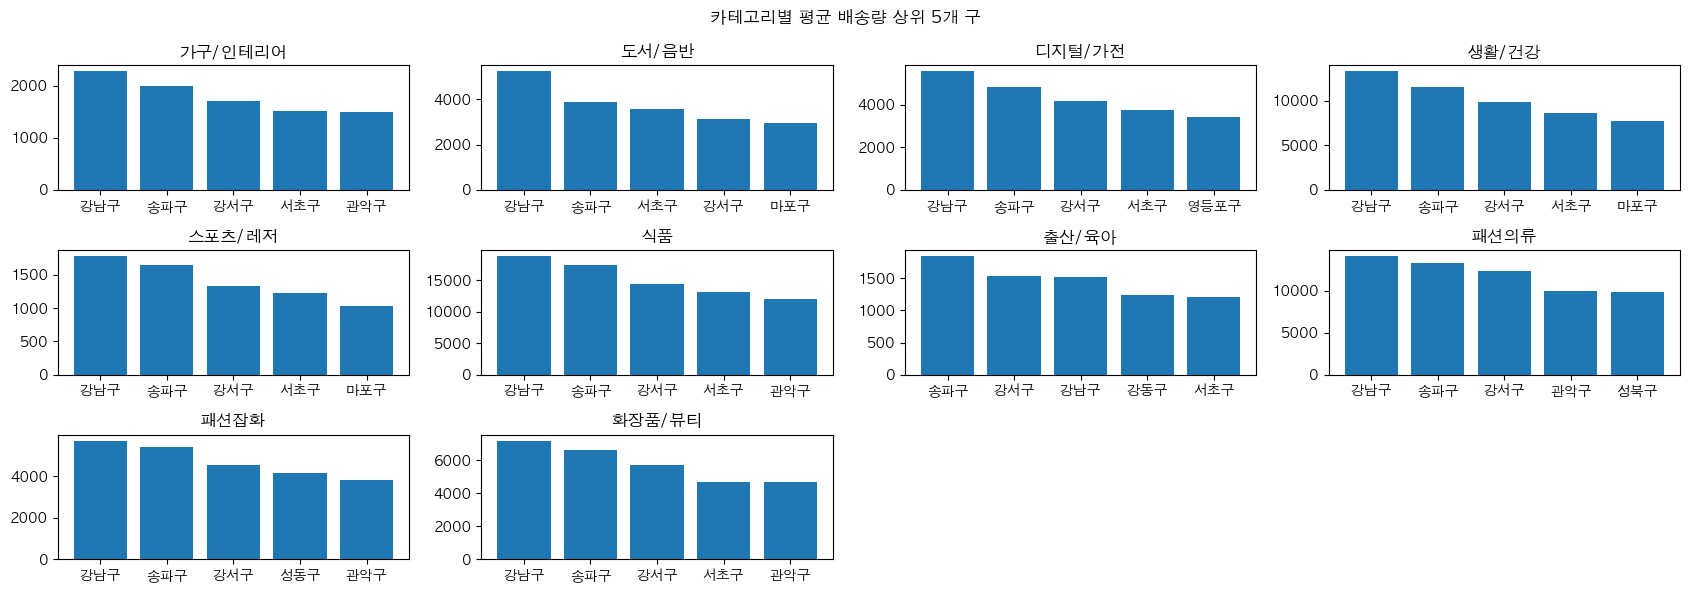

In [ ]:
# 그래프 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.suptitle('카테고리별 평균 배송량 상위 5개 구')

fig.add_subplot(3,4,1)
plt.title('가구/인테리어')
plt.bar(furni.index, furni.values)

fig.add_subplot(3,4,2)
plt.title('도서/음반')
plt.bar(book.index, book.values)

fig.add_subplot(3,4,3)
plt.title('디지털/가전')
plt.bar(digi.index, digi.values)

fig.add_subplot(3,4,4)
plt.title('생활/건강')
plt.bar(life.index, life.values)

fig.add_subplot(3,4,5)
plt.title('스포츠/레저')
plt.bar(sports.index, sports.values)

fig.add_subplot(3,4,6)
plt.title('식품')
plt.bar(food.index, food.values)

fig.add_subplot(3,4,7)
plt.title('출산/육아')
plt.bar(baby.index, baby.values)

fig.add_subplot(3,4,8)
plt.title('패션의류')
plt.bar(clothes.index, clothes.values)

fig.add_subplot(3,4,9)
plt.title('패션잡화')
plt.bar(acc.index, acc.values)

fig.add_subplot(3,4,10)
plt.title('화장품/뷰티')
plt.bar(beauty.index, beauty.values)

# fig.add_subplot(3,4,11)
# plt.title('기타')
# plt.bar(other.index, other.values)

plt.tight_layout()  # 간격 조절해 서로 겹치지 않게 하기 위함

In [ ]:
item_col = df.iloc[:, 2:-1].columns
item_col

Index(['가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아',
       '패션의류', '패션잡화', '화장품/미용'],
      dtype='object')

## 카테고리별 배송 비율 상위 5개 구 시각화

In [ ]:
rate_df = df.groupby("구명").sum(numeric_only=True)
rate_df


가구/인테리어          기타      도서/음반     디지털/가전       생활/건강     스포츠/레저  \
구명                                                                         
강남구   2279357.0  11215107.0  5234982.0  5567876.0  13353675.0  1789511.0   
강동구   1221330.0   4856779.0  2199148.0  2837748.0   6944727.0   961934.0   
강북구    664749.0   2724927.0  1075818.0  1566451.0   3918189.0   501389.0   
강서구   1712049.0   7060038.0  3153663.0  4196520.0   9887857.0  1333148.0   
관악구   1494744.0   5426535.0  2253430.0  3397357.0   7563405.0   996466.0   
광진구   1058130.0   4356041.0  1739101.0  2504160.0   5714160.0   784990.0   
구로구   1088237.0   4597695.0  2077278.0  2932368.0   6612404.0   852450.0   
금천구    740950.0   3814948.0  1256279.0  2520328.0   4381434.0   638167.0   
노원구   1210348.0   4824123.0  2241615.0  2864555.0   7171331.0   945072.0   
도봉구    719900.0   2804153.0  1157826.0  1711442.0   4227550.0   541647.0   
동대문구   980233.0   4338735.0  1798300.0  2264873.0   5469316.0   718268.0   
동작구   1095283.0   4291222.0  2127606.0  2506126.0   5991026.0   808756.0   
마포구   1453223.0   6087171.0  2956096.0  3395600.0   7781334.0  1031130.0   
서대문구   923108.0   3781094.0  1996246.0  2148944.0   5141345.0   675961.0   
서초구   1521770.0   6881820.0  3589126.0  3770073.0   8635583.0  1231520.0   
성동구    948519.0   5719450.0  2319968.0  2377720.0   5517362.0   813021.0   
성북구   1177634.0   5228429.0  2367261.0  2714288.0   6691219.0   861311.0   
송파구   2003529.0   8557198.0  3891027.0  4824333.0  11567553.0  1656876.0   
양천구   1064073.0   4645987.0  2368655.0  2559985.0   6410282.0   875222.0   
영등포구  1305329.0   5745758.0  2667672.0  3429396.0   7389988.0  1030393.0   
용산구    832133.0   3715444.0  1542302.0  3227081.0   4660667.0   630769.0   
은평구   1166668.0   4532538.0  1949494.0  2638426.0   6718565.0   898410.0   
종로구    594534.0   2825796.0  1478520.0  1445872.0   3437592.0   431349.0   
중구     651834.0   3981389.0  1611506.0  1731257.0   4030497.0   501068.0   
중랑구    936736.0   3905630.0  1297699.0  2102169.0   5316020.0   705663.0   

              식품      출산/육아        패션의류       패션잡화     화장품/미용          총량  
구명                                                                         
강남구   18918249.0  1521346.0  14220731.0  5721318.0  7210511.0  87240594.0  
강동구   10565551.0  1250579.0   8182115.0  3456181.0  3843670.0  46430394.0  
강북구    6253587.0   511752.0   5110176.0  1888717.0  2170607.0  26448583.0  
강서구   14410493.0  1533072.0  12373532.0  4569676.0  5741683.0  66124239.0  
관악구   11984274.0   908977.0   9965549.0  3835698.0  4666102.0  52613176.0  
광진구    8454835.0   757606.0   7416505.0  2918410.0  3334542.0  39129137.0  
구로구    9744621.0  1067459.0   7572984.0  2862645.0  3483555.0  42994559.0  
금천구    5978597.0   581477.0   6316923.0  2554649.0  2296222.0  31152520.0  
노원구   11057405.0  1118660.0   8884725.0  3287878.0  3881833.0  47589289.0  
도봉구    6698524.0   601810.0   5220193.0  1939601.0  2332053.0  28021867.0  
동대문구   8185486.0   817240.0   7554810.0  2818655.0  3164395.0  38197266.0  
동작구    9541200.0   909258.0   7477874.0  2963701.0  3573451.0  41382774.0  
마포구   11024717.0  1076570.0   8757661.0  3656516.0  4058402.0  51400184.0  
서대문구   7876526.0   780671.0   6246613.0  2533782.0  2807769.0  34992510.0  
서초구   13227103.0  1215817.0   9218652.0  3762650.0  4703631.0  57900322.0  
성동구    7970758.0   890744.0   9536600.0  4150161.0  2940446.0  43285583.0  
성북구   10219560.0  1071347.0   9875011.0  3485746.0  3859893.0  47659923.0  
송파구   17415141.0  1851789.0  13423392.0  5402680.0  6630930.0  77405702.0  
양천구    9887265.0   996780.0   7565367.0  3025191.0  3563799.0  43056409.0  
영등포구  10932733.0  1150599.0   7992084.0  3389683.0  4117162.0  49269902.0  
용산구    7110999.0   612168.0   5105649.0  2091054.0  2490962.0  32095895.0  
은평구   10491993.0  1021503.0   7841555.0  3105770.0  3692097.0  44161714.0  
종로구    5120963.0   361676.0   3863754.0  1571175.0  1578830.0  22763780.0  
중구     5395736.0   436779.0   5143254.0  2148489.0  198

In [ ]:
sum_col = rate_df["총량"]

for col in item_col:
    rate_df[f"{col}_비율"] = round(((rate_df[col] / sum_col) * 100), 2)
    rate_df.drop(col, axis=1, inplace=True)
rate_df.drop("총량", axis=1, inplace=True)

In [ ]:
rate_df.reset_index(inplace=True)
rate_df

구명  가구/인테리어_비율  기타_비율  도서/음반_비율  디지털/가전_비율  생활/건강_비율  스포츠/레저_비율  식품_비율  \
0    강남구        2.61  12.86      6.00       6.38     15.31       2.05  21.69   
1    강동구        2.63  10.46      4.74       6.11     14.96       2.07  22.76   
2    강북구        2.51  10.30      4.07       5.92     14.81       1.90  23.64   
3    강서구        2.59  10.68      4.77       6.35     14.95       2.02  21.79   
4    관악구        2.84  10.31      4.28       6.46     14.38       1.89  22.78   
5    광진구        2.70  11.13      4.44       6.40     14.60       2.01  21.61   
6    구로구        2.53  10.69      4.83       6.82     15.38       1.98  22.66   
7    금천구        2.38  12.25      4.03       8.09     14.06       2.05  19.19   
8    노원구        2.54  10.14      4.71       6.02     15.07       1.99  23.24   
9    도봉구        2.57  10.01      4.13       6.11     15.09       1.93  23.90   
10  동대문구        2.57  11.36      4.71       5.93     14.32       1.88  21.43   
11   동작구        2.65  10.37      5.14       6.06     14.48       1.95  23.06   
12   마포구        2.83  11.84      5.75       6.61     15.14       2.01  21.45   
13  서대문구        2.64  10.81      5.70       6.14     14.69       1.93  22.51   
14   서초구        2.63  11.89      6.20       6.51     14.91       2.13  22.84   
15   성동구        2.19  13.21      5.36       5.49     12.75       1.88  18.41   
16   성북구        2.47  10.97      4.97       5.70     14.04       1.81  21.44   
17   송파구        2.59  11.05      5.03       6.23     14.94       2.14  22.50   
18   양천구        2.47  10.79      5.50       5.95     14.89       2.03  22.96   
19  영등포구        2.65  11.66      5.41       6.96     15.00       2.09  22.19   
20   용산구        2.59  11.58      4.81      10.05     14.52       1.97  22.16   
21   은평구        2.64  10.26      4.41       5.97     15.21       2.03  23.76   
22   종로구        2.61  12.41      6.50       6.35     15.10       1.89  22.50   
23    중구        2.35  14.38      5.82       6.25     14.56       1.81  19.49   
24   중랑구        2.64  11.02      3.66       5.93     15.01       1.99  22.42   

    출산/육아_비율  패션의류_비율  패션잡화_비율  화장품/미용_비율  
0       1.74    16.30     6.56       8.27  
1       2.69    17.62     7.44       8.28  
2       1.93    19.32     7.14       8.21  
3       2.32    18.71     6.91       8.68  
4       1.73    18.94     7.29       8.87  
5       1.94    18.95     7.46       8.52  
6       2.48    17.61     6.66       8.10  
7       1.87    20.28     8.20       7.37  
8       2.35    18.67     6.91       8.16  
9       2.15    18.63     6.92       8.32  
10      2.14    19.78     7.38       8.28  
11      2.20    18.07     7.16       8.64  
12      2.09    17.04     7.11       7.90  
13      2.23    17.85     7.24       8.02  
14      2.10    15.92     6.50       8.12  
15      2.06    22.03     9.59       6.79  
16      2.25    20.72     7.31       8.10  
17      2.39    17.34     6.98       8.57  
18      2.32    17.57     7.03       8.28  
19      2.34    16.22     6.88       8.36  
20      1.91    15.91     6.52       7.76  
21      2.31    17.76     7.03       8.36  
22      1.59    16.97     6.90       6.94  
23      1.58    18.58     7.76       7.17  
24      2.32    19.19     7.17       8.42

In [ ]:
# 카테고리별 분류
furni = rate_df[['구명','가구/인테리어_비율']].groupby('구명').mean()
furni = furni['가구/인테리어_비율'].nlargest(5)

# other = rate_df[['구명','기타_비율']].groupby('구명').mean()
# other = other['기타_비율'].nlargest(5)

book =  rate_df[['구명','도서/음반_비율']].groupby('구명').mean()
book = book['도서/음반_비율'].nlargest(5)

digi =  rate_df[['구명','디지털/가전_비율']].groupby('구명').mean()
digi = digi['디지털/가전_비율'].nlargest(5)

life =  rate_df[['구명','생활/건강_비율']].groupby('구명').mean()
life = life['생활/건강_비율'].nlargest(5)

sports = rate_df[['구명','스포츠/레저_비율']].groupby('구명').mean()
sports = sports['스포츠/레저_비율'].nlargest(5)

food =  rate_df[['구명','식품_비율']].groupby('구명').mean()
food = food['식품_비율'].nlargest(5)

baby = rate_df[['구명','출산/육아_비율']].groupby('구명').mean()
baby = baby['출산/육아_비율'].nlargest(5)

clothes =  rate_df[['구명','패션의류_비율']].groupby('구명').mean()
clothes = clothes['패션의류_비율'].nlargest(5)

acc =  rate_df[['구명','패션잡화_비율']].groupby('구명').mean()
acc = acc['패션잡화_비율'].nlargest(5)

beauty =  rate_df[['구명','화장품/미용_비율']].groupby('구명').mean()
beauty = beauty['화장품/미용_비율'].nlargest(5)

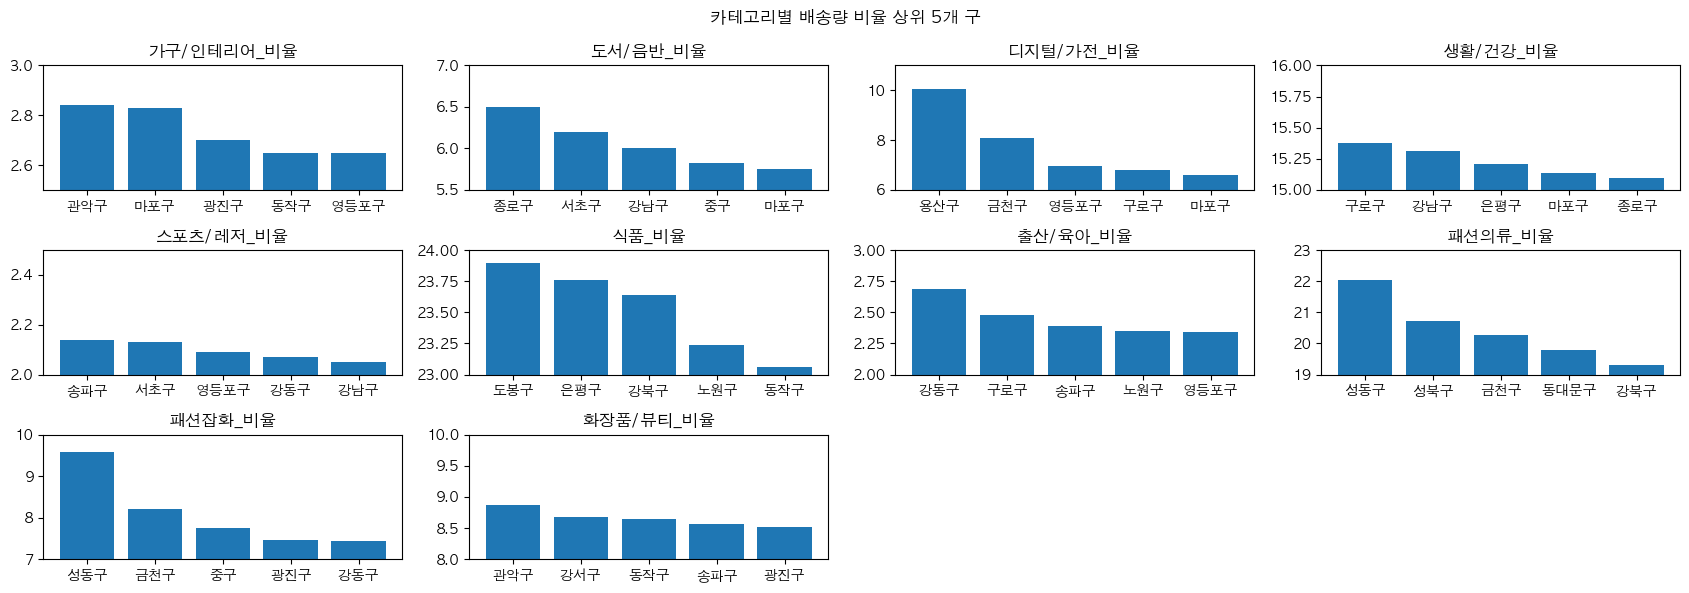

In [ ]:
# 그래프 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.suptitle('카테고리별 배송량 비율 상위 5개 구')

fig.add_subplot(3,4,1)
plt.title('가구/인테리어_비율')
plt.ylim(2.5, 3)
plt.bar(furni.index, furni.values)

fig.add_subplot(3,4,2)
plt.title('도서/음반_비율')
plt.ylim(5.5, 7)
plt.bar(book.index, book.values)

fig.add_subplot(3,4,3)
plt.title('디지털/가전_비율')
plt.ylim(6, 11)
plt.bar(digi.index, digi.values)

fig.add_subplot(3,4,4)
plt.title('생활/건강_비율')
plt.ylim(15, 16)
plt.bar(life.index, life.values)

fig.add_subplot(3,4,5)
plt.title('스포츠/레저_비율')
plt.ylim(2, 2.5)
plt.bar(sports.index, sports.values)

fig.add_subplot(3,4,6)
plt.title('식품_비율')
plt.ylim(23, 24)
plt.bar(food.index, food.values)

fig.add_subplot(3,4,7)
plt.title('출산/육아_비율')
plt.ylim(2, 3)
plt.bar(baby.index, baby.values)

fig.add_subplot(3,4,8)
plt.title('패션의류_비율')
plt.ylim(19, 23)
plt.bar(clothes.index, clothes.values)

fig.add_subplot(3,4,9)
plt.title('패션잡화_비율')
plt.ylim(7, 10)
plt.bar(acc.index, acc.values)

fig.add_subplot(3,4,10)
plt.title('화장품/뷰티_비율')
plt.ylim(8, 10)
plt.bar(beauty.index, beauty.values)

# fig.add_subplot(3,4,11)
# plt.title('기타_비율')
# plt.bar(other.index, other.values)

plt.tight_layout()  # 간격 조절해 서로 겹치지 않게 하기 위함

------

## 요일별 시각화

In [ ]:
df2 = df
df2

배송년월일   구명  가구/인테리어     기타   도서/음반  디지털/가전  생활/건강  스포츠/레저      식품  \
0     2021-01-01  강남구     27.0  324.0  2921.0   238.0  464.0    61.0  1088.0   
1     2021-01-01  강동구     16.0  154.0  1200.0   123.0  243.0    59.0   724.0   
2     2021-01-01  강북구     12.0   68.0   566.0    47.0  141.0    26.0   369.0   
3     2021-01-01  강서구     24.0  219.0  1578.0   171.0  360.0    60.0   957.0   
4     2021-01-01  관악구      8.0  171.0  1135.0   172.0  285.0    40.0   869.0   
...          ...  ...      ...    ...     ...     ...    ...     ...     ...   
25049 2023-09-30  용산구     13.0   30.0     5.0    25.0   21.0    19.0    83.0   
25050 2023-09-30  은평구     39.0   39.0     4.0    48.0   51.0    25.0    87.0   
25051 2023-09-30  종로구      4.0   23.0     4.0    16.0   17.0    10.0    32.0   
25052 2023-09-30   중구      8.0   24.0     0.0    17.0   14.0     8.0    40.0   
25053 2023-09-30  중랑구     31.0   49.0     7.0    26.0   39.0    29.0    59.0   

       출산/육아   패션의류   패션잡화  화장품/미용      총량  
0      258.0  284.0  211.0   396.0  6272.0  
1      118.0  119.0   76.0   193.0  3025.0  
2       52.0   62.0   26.0   114.0  1483.0  
3      154.0  193.0   94.0   309.0  4119.0  
4      101.0  143.0   97.0   182.0  3203.0  
...      ...    ...    ...     ...     ...  
25049    3.0   39.0   63.0    21.0   322.0  
25050    9.0   59.0  113.0    37.0   511.0  
25051    0.0   19.0   64.0    13.0   202.0  
25052    0.0   19.0   54.0    13.0   197.0  
25053    9.0   59.0  118.0    26.0   452.0  

[25054 rows x 14 columns]

In [ ]:
# 데이터프레임에 요일 추가
df2["요일"] = df2["배송년월일"].dt.day_name()
df2["요일"] = df["요일"].map({"Monday":"월요일", "Tuesday":"화요일", "Thursday":"수요일", "Wednesday":"목요일", "Friday":"금요일", "Saturday":"토요일", "Sunday":"일요일"})
df2

배송년월일   구명  가구/인테리어     기타   도서/음반  디지털/가전  생활/건강  스포츠/레저      식품  \
0     2021-01-01  강남구     27.0  324.0  2921.0   238.0  464.0    61.0  1088.0   
1     2021-01-01  강동구     16.0  154.0  1200.0   123.0  243.0    59.0   724.0   
2     2021-01-01  강북구     12.0   68.0   566.0    47.0  141.0    26.0   369.0   
3     2021-01-01  강서구     24.0  219.0  1578.0   171.0  360.0    60.0   957.0   
4     2021-01-01  관악구      8.0  171.0  1135.0   172.0  285.0    40.0   869.0   
...          ...  ...      ...    ...     ...     ...    ...     ...     ...   
25049 2023-09-30  용산구     13.0   30.0     5.0    25.0   21.0    19.0    83.0   
25050 2023-09-30  은평구     39.0   39.0     4.0    48.0   51.0    25.0    87.0   
25051 2023-09-30  종로구      4.0   23.0     4.0    16.0   17.0    10.0    32.0   
25052 2023-09-30   중구      8.0   24.0     0.0    17.0   14.0     8.0    40.0   
25053 2023-09-30  중랑구     31.0   49.0     7.0    26.0   39.0    29.0    59.0   

       출산/육아   패션의류   패션잡화  화장품/미용      총량   요일  
0      258.0  284.0  211.0   396.0  6272.0  금요일  
1      118.0  119.0   76.0   193.0  3025.0  금요일  
2       52.0   62.0   26.0   114.0  1483.0  금요일  
3      154.0  193.0   94.0   309.0  4119.0  금요일  
4      101.0  143.0   97.0   182.0  3203.0  금요일  
...      ...    ...    ...     ...     ...  ...  
25049    3.0   39.0   63.0    21.0   322.0  토요일  
25050    9.0   59.0  113.0    37.0   511.0  토요일  
25051    0.0   19.0   64.0    13.0   202.0  토요일  
25052    0.0   19.0   54.0    13.0   197.0  토요일  
25053    9.0   59.0  118.0    26.0   452.0  토요일  

[25054 rows x 15 columns]

In [ ]:
df2.groupby(["구명", "요일"]).sum(numeric_only=True)["총량"].reset_index().set_index("구명")

요일          총량
구명                  
강남구  금요일  13525838.0
강남구  목요일  15149032.0
강남구  수요일  15000372.0
강남구  월요일  21908349.0
강남구  일요일   2042617.0
..   ...         ...
중랑구  수요일   6101993.0
중랑구  월요일   9196030.0
중랑구  일요일    772605.0
중랑구  토요일    920062.0
중랑구  화요일   6845812.0

[175 rows x 2 columns]

### 요일별 평균 배송량 막대그래프

In [ ]:
day_mean = df2.groupby("요일").mean(numeric_only=True)
day_mean = day_mean.reindex(index=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])
day_mean

가구/인테리어           기타        도서/음반       디지털/가전         생활/건강  \
요일                                                                      
월요일  2254.243077  8750.716643  3384.521119  5410.785455  12583.956643   
화요일  1599.225175  6948.772587  3000.001958  3903.985175   8950.807832   
수요일  1371.723916  6135.617343  2693.827413  3473.404196   7811.701259   
목요일  1387.061538  6260.768671  2766.916923  3443.979021   7886.912727   
금요일  1246.702145  5639.677626  2502.803566  3080.092784   6992.529395   
토요일   113.342135  1100.355753   749.217899   385.056420    898.878266   
일요일    90.657135   357.546958   651.959350   214.497337    867.227642   

          스포츠/레저            식품        출산/육아          패션의류         패션잡화  \
요일                                                                       
월요일  1755.082517  17679.023497  1734.618182  13871.427972  5649.020979   
화요일  1213.802517  13076.306573  1307.594965  11101.850070  4317.608951   
수요일  1051.294266  11870.133427  1168.394685   9720.991049  3809.398881   
목요일  1051.813986  11808.537063  1163.977902   9707.306294  3837.450909   
금요일   917.316523  10235.064085  1037.468097   9032.476734  3501.211758   
토요일   141.949972   1425.640912   144.651473   2058.839633   775.591162   
일요일    78.253434   2787.556490   114.376507    870.350435   380.420521   

          화장품/미용            총량  
요일                              
월요일  6978.011189  80269.808671  
화요일  4874.038042  60440.261538  
수요일  4230.722517  53452.773986  
목요일  4238.125874  53651.741259  
금요일  3810.840346  48095.271663  
토요일   633.274875   8448.105336  
일요일   702.231006   7141.813008

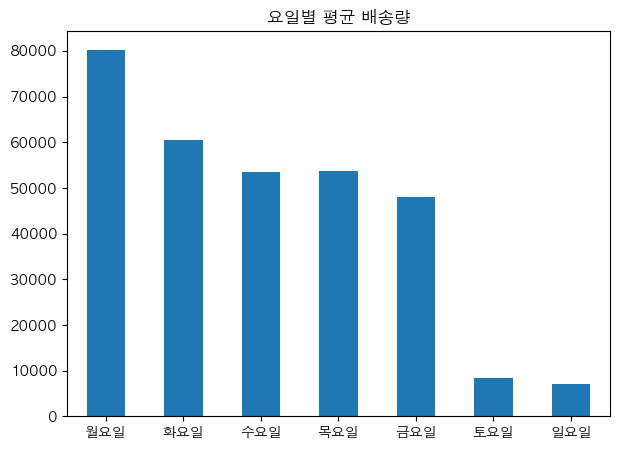

In [ ]:
plt.figure(figsize=(7, 5))
day_mean["총량"].plot.bar()
plt.title("요일별 평균 배송량")
plt.xticks(rotation=0)
plt.xlabel("")
plt.show()

- 주말의 주문에 대해 월요일에 배송이 몰린다고 예상됨

### 요일별 배송량 상위 5개구 막대

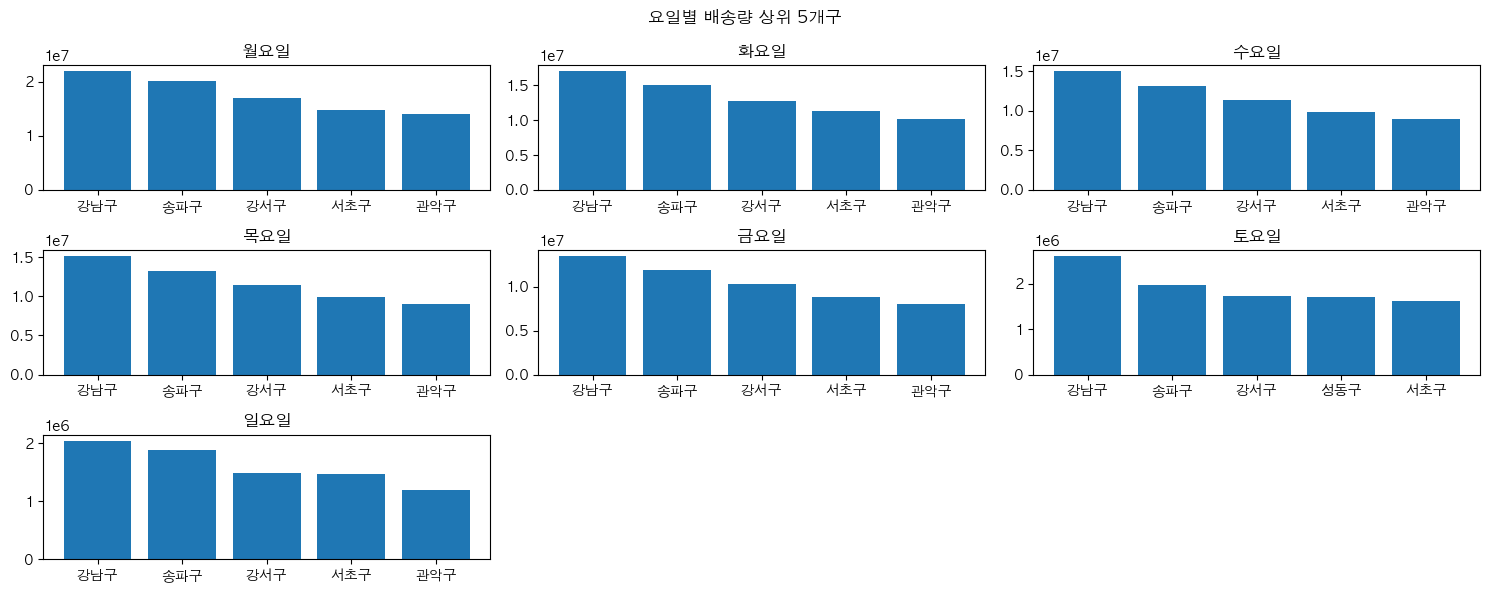

In [ ]:
# 요일별 분석(2)
df_daysum = df2.groupby(["구명", "요일"]).sum(numeric_only=True)["총량"].reset_index().set_index("구명")

mon = df_daysum[df_daysum['요일'] == '월요일']
mon = mon["총량"]
monday = mon.sort_values(ascending=False).nlargest(5)

tue = df_daysum[df_daysum['요일'] == '화요일']
tue = tue["총량"]
tuesday = tue.sort_values(ascending=False).nlargest(5)

wed = df_daysum[df_daysum['요일'] == '수요일']
wed = wed["총량"]
wednesday = wed.sort_values(ascending=False).nlargest(5)

thu = df_daysum[df_daysum['요일'] == '목요일']
thu = thu["총량"]
thursday = thu.sort_values(ascending=False).nlargest(5)

fri = df_daysum[df_daysum['요일'] == '금요일']
fri = fri["총량"]
friday = fri.sort_values(ascending=False).nlargest(5)

sat = df_daysum[df_daysum['요일'] == '토요일']
sat = sat["총량"]
saturday = sat.sort_values(ascending=False).nlargest(5)

sun = df_daysum[df_daysum['요일'] == '일요일']
sun = sun["총량"]
sunday = sun.sort_values(ascending=False).nlargest(5)


# 시각화
fig = plt.figure(figsize=(15,6))
plt.suptitle('요일별 배송량 상위 5개구')


fig.add_subplot(3,3,1)
plt.title('월요일')
plt.bar(monday.index, monday.values)
# for i, value in enumerate(monday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,2)
plt.title('화요일')
plt.bar(tuesday.index, tuesday.values)
# for i, value in enumerate(tuesday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,3)
plt.title('수요일')
plt.bar(wednesday.index, wednesday.values)
# for i, value in enumerate(wednesday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,4)
plt.title('목요일')
plt.bar(thursday.index, thursday.values)
# for i, value in enumerate(thursday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,5)
plt.title('금요일')
plt.bar(friday.index, friday.values)
# for i, value in enumerate(friday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,6)
plt.title('토요일')
plt.bar(saturday.index, saturday.values)
# for i, value in enumerate(saturday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

fig.add_subplot(3,3,7)
plt.title('일요일')
plt.bar(sunday.index, sunday.values)
# for i, value in enumerate(sunday.values):
#     plt.text(i, value + 100, str(value), ha='center', va='bottom')

plt.tight_layout()

In [ ]:
day_df = df2.groupby("요일").sum(numeric_only=True)
day_df.reindex(index=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

가구/인테리어          기타       도서/음반      디지털/가전       생활/건강     스포츠/레저  \
요일                                                                          
월요일  8058919.0  31283812.0  12099663.0  19343558.0  44987645.0  6274420.0   
화요일  5717230.0  24841862.0  10725007.0  13956747.0  31999138.0  4339344.0   
수요일  4903913.0  21934832.0   9630433.0  12417420.0  27926832.0  3758377.0   
목요일  4958745.0  22382248.0   9891728.0  12312225.0  28195713.0  3760235.0   
금요일  4474414.0  20240803.0   8982562.0  11054453.0  25096188.0  3292249.0   
토요일   407805.0   3959080.0   2695686.0   1385433.0   3234164.0   510736.0   
일요일   323374.0   1275370.0   2325539.0    765112.0   3093401.0   279130.0   

             식품      출산/육아        패션의류        패션잡화      화장품/미용           총량  
요일                                                                           
월요일  63202509.0  6201260.0  49590355.0  20195250.0  24946390.0  286964566.0  
화요일  46747796.0  4674652.0  39689114.0  15435452.0  17424686.0  216073935.0  
수요일  42435727.0  4177011.0  34752543.0  13618601.0  15124833.0  191093667.0  
목요일  42215520.0  4161221.0  34703620.0  13718887.0  15151300.0  191804975.0  
금요일  36733645.0  3723473.0  32417559.0  12565849.0  13677106.0  172613930.0  
토요일   5129456.0   520456.0   7407705.0   2790577.0   2278523.0   30396283.0  
일요일   9943214.0   407981.0   3104540.0   1356960.0   2504858.0   25474847.0

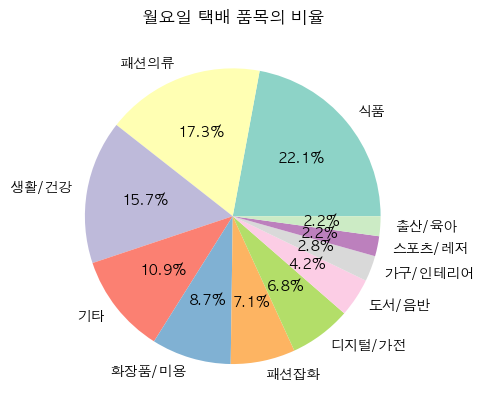

In [ ]:
mon = day_df.loc["월요일"].drop("총량").sort_values(ascending=False)
data = mon.values
colors = sns.color_palette("Set3")[0:len(data)]
exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

mon.plot.pie(colors=colors, autopct="%.1f%%")
plt.title("월요일 택배 품목의 비율")
plt.ylabel("")
plt.show()

### 요일/ 구별 파이그래프

#### 강남구

In [ ]:
gn_day_df = df2[df2["구명"] == "강남구"].groupby("요일").sum(numeric_only=True)
gn_day_df = gn_day_df.reindex(index=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])
gn_day_df

가구/인테리어         기타      도서/음반     디지털/가전      생활/건강    스포츠/레저  \
요일                                                                    
월요일  620294.0  2600109.0  1111960.0  1482667.0  3500442.0  507749.0   
화요일  452975.0  2227078.0   994347.0  1110188.0  2589307.0  350919.0   
수요일  389999.0  1987638.0   886165.0   977537.0  2291155.0  300364.0   
목요일  395922.0  2002673.0   915209.0   982665.0  2334193.0  301005.0   
금요일  359991.0  1834653.0   831047.0   857858.0  2043991.0  265323.0   
토요일   33239.0   447224.0   257861.0   100316.0   347278.0   42025.0   
일요일   26937.0   115732.0   238393.0    56645.0   247309.0   22126.0   

            식품     출산/육아       패션의류       패션잡화     화장품/미용          총량  
요일                                                                     
월요일  4755874.0  398976.0  3476628.0  1437716.0  1955361.0  21908349.0  
화요일  3639737.0  296218.0  2807902.0  1106591.0  1381867.0  16999754.0  
수요일  3256397.0  264126.0  2439241.0   976709.0  1197994.0  15000372.0  
목요일  3287614.0  261563.0  2456769.0   988565.0  1194056.0  15149032.0  
금요일  2792512.0  233834.0  2292791.0   901359.0  1083848.0  13525838.0  
토요일   417336.0   37282.0   516732.0   200684.0   208116.0   2614632.0  
일요일   768779.0   29347.0   230668.0   109694.0   189269.0   2042617.0

In [ ]:
gn_day_df.index

Index(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], dtype='object', name='요일')

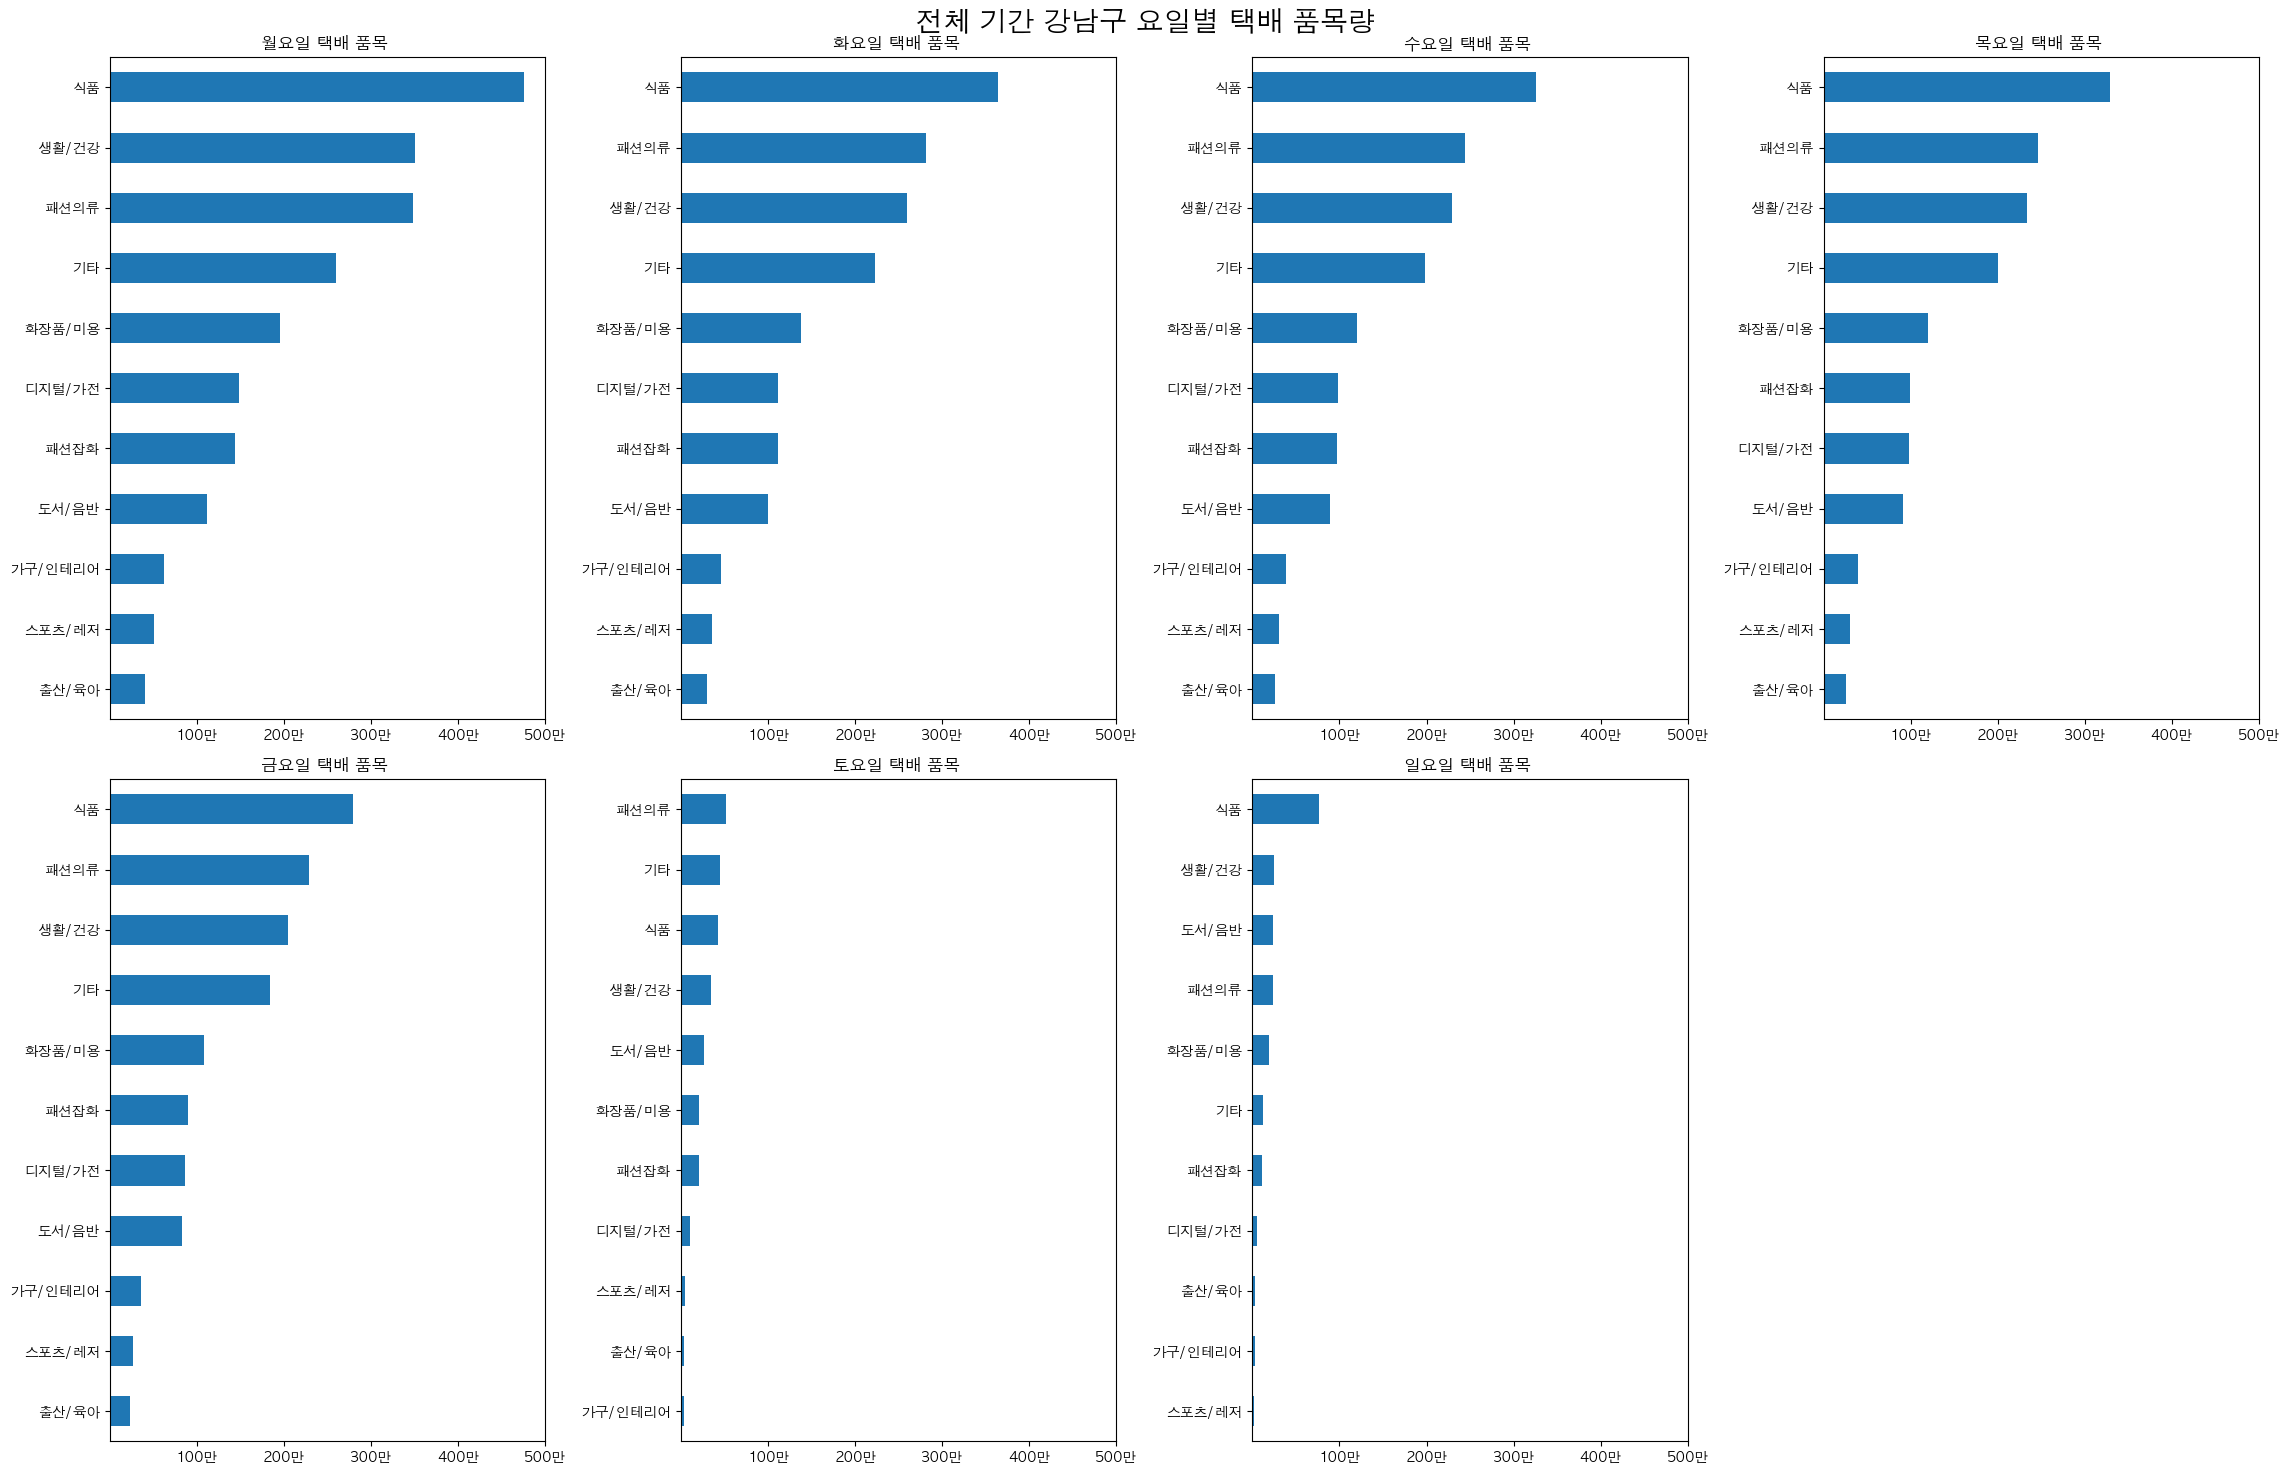

In [ ]:
idx_list = gn_day_df.index
fig = plt.figure(figsize=(23, 15))
plt.rc('font', family='AppleGothic')
rpt = 0
fig.suptitle(f"전체 기간 강남구 요일별 택배 품목량", fontweight="bold", fontsize=20)

for day in idx_list:
        rpt += 1
        fig.add_subplot(2, 4, rpt)
        gn_day_df.drop("총량", axis=1).loc[day].sort_values().plot.barh()
        plt.title(f"{day} 택배 품목 ")
        plt.xticks([1000000, 2000000, 3000000, 4000000, 5000000], labels=["100만", "200만", "300만", "400만", "500만"])
        plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# 구별 파이그래프 생성 함수
def day_pie(name):  # name > 구를 제외한 구 이름 입력 / ex) 강남구 > 강남
    day_df = df2[df2["구명"] == f"{name}구"].groupby("요일").sum(numeric_only=True)

    fig = plt.figure(figsize=(25, 25))
    plt.rc('font', family='AppleGothic') # ========================================================================================================================= 폰트명

    fig.suptitle(f"전체 기간 {name}구 요일별 택배 비율", fontweight="bold", fontsize=20)

    idx = ["식품", "패션의류", "생활/건강", "화장품/미용", "디지털/가전", "패션잡화", "도서/음반", "가구/인테리어", "스포츠/레저", "출산/육아", "기타"]
    days = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
    rpt = 0
    colors = sns.color_palette("Set3")[0:len(idx)]
    exp = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

    for day in days:
        rpt += 1
        fig.add_subplot(3, 3, rpt)
        day_df.drop("총량", axis=1).loc[day].reindex(index=idx).plot.pie(colors=colors, explode=exp, autopct="%.1f%%")
        plt.title(f"{day} 택배 품목 비율")
        plt.ylabel("")


    plt.savefig(f"{name}구 요일별 택배.png")
    plt.show()


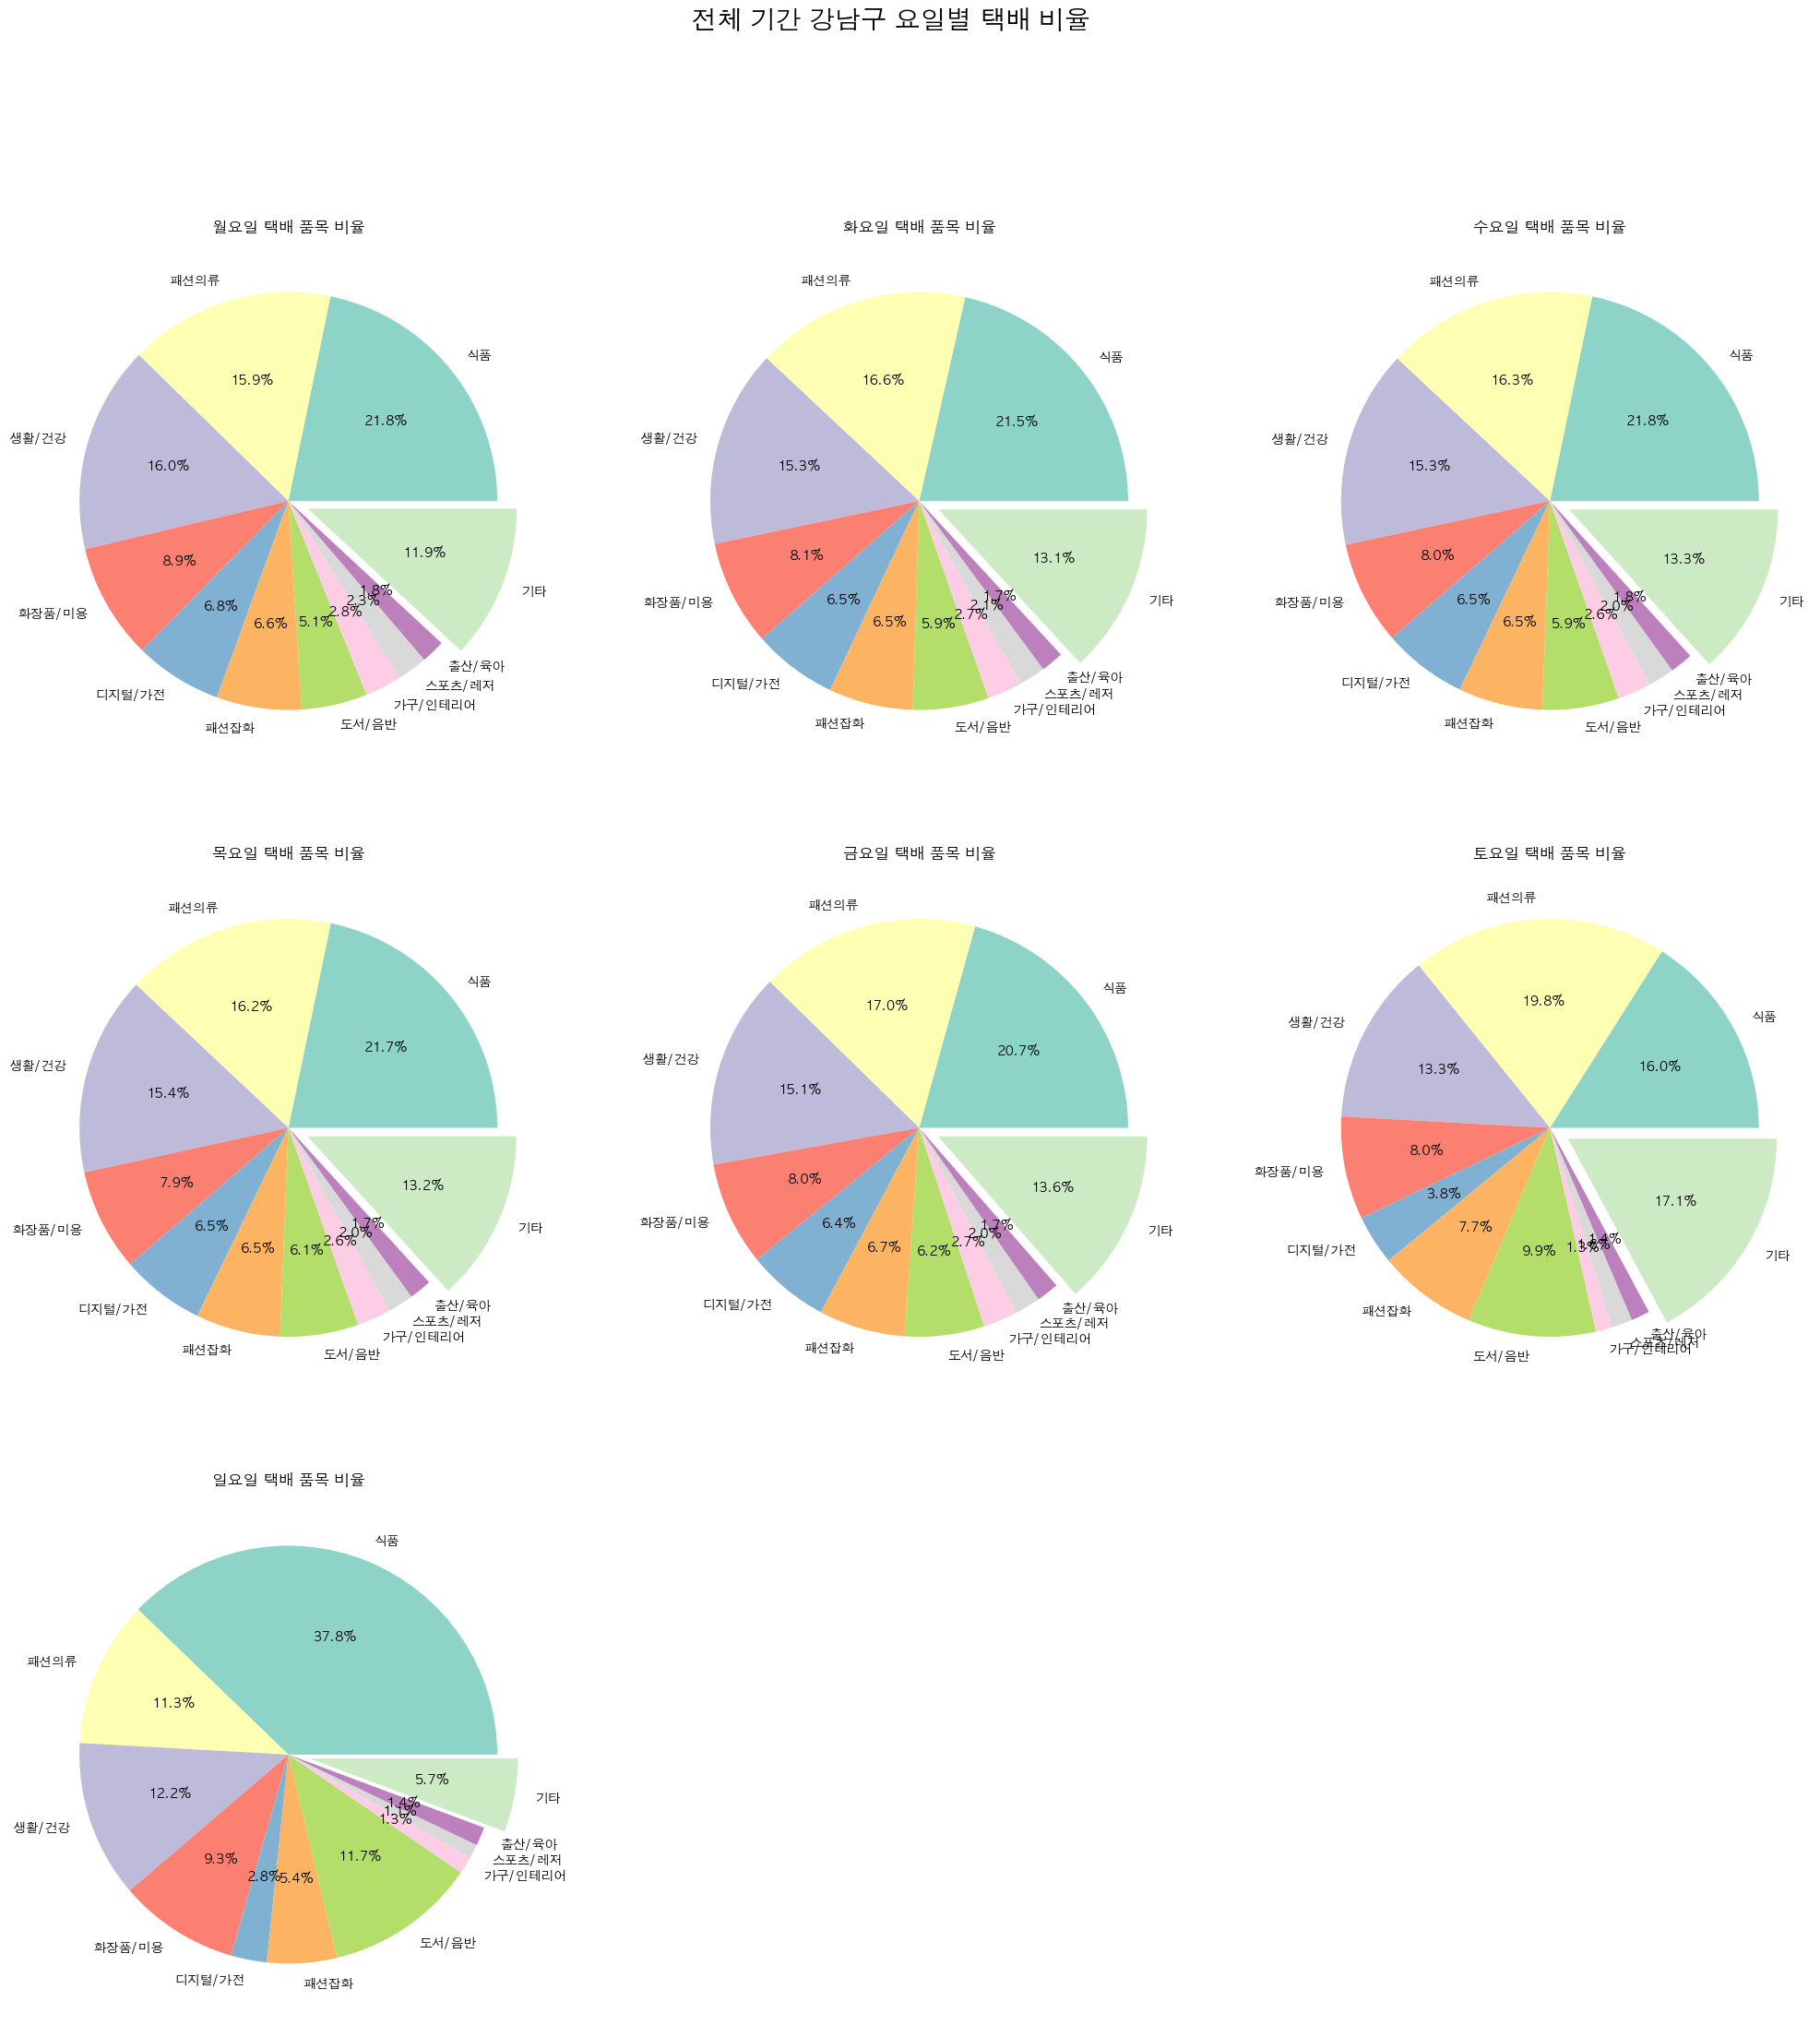

In [ ]:
day_pie("강남")

- 평일의 경우 전체적인 비율의 큰 차이가 없음 > 특정 요일에 선호되는 품목을 도출하기 어려움
- 배송량이 적은 토/일요일에는 비율의 변화가 보임
- 토요일의 경우 식품의 비율이 전체 요일중 가장 작고, 일요일의 경우 식품의 비율이 매우높아짐

#### 송파구

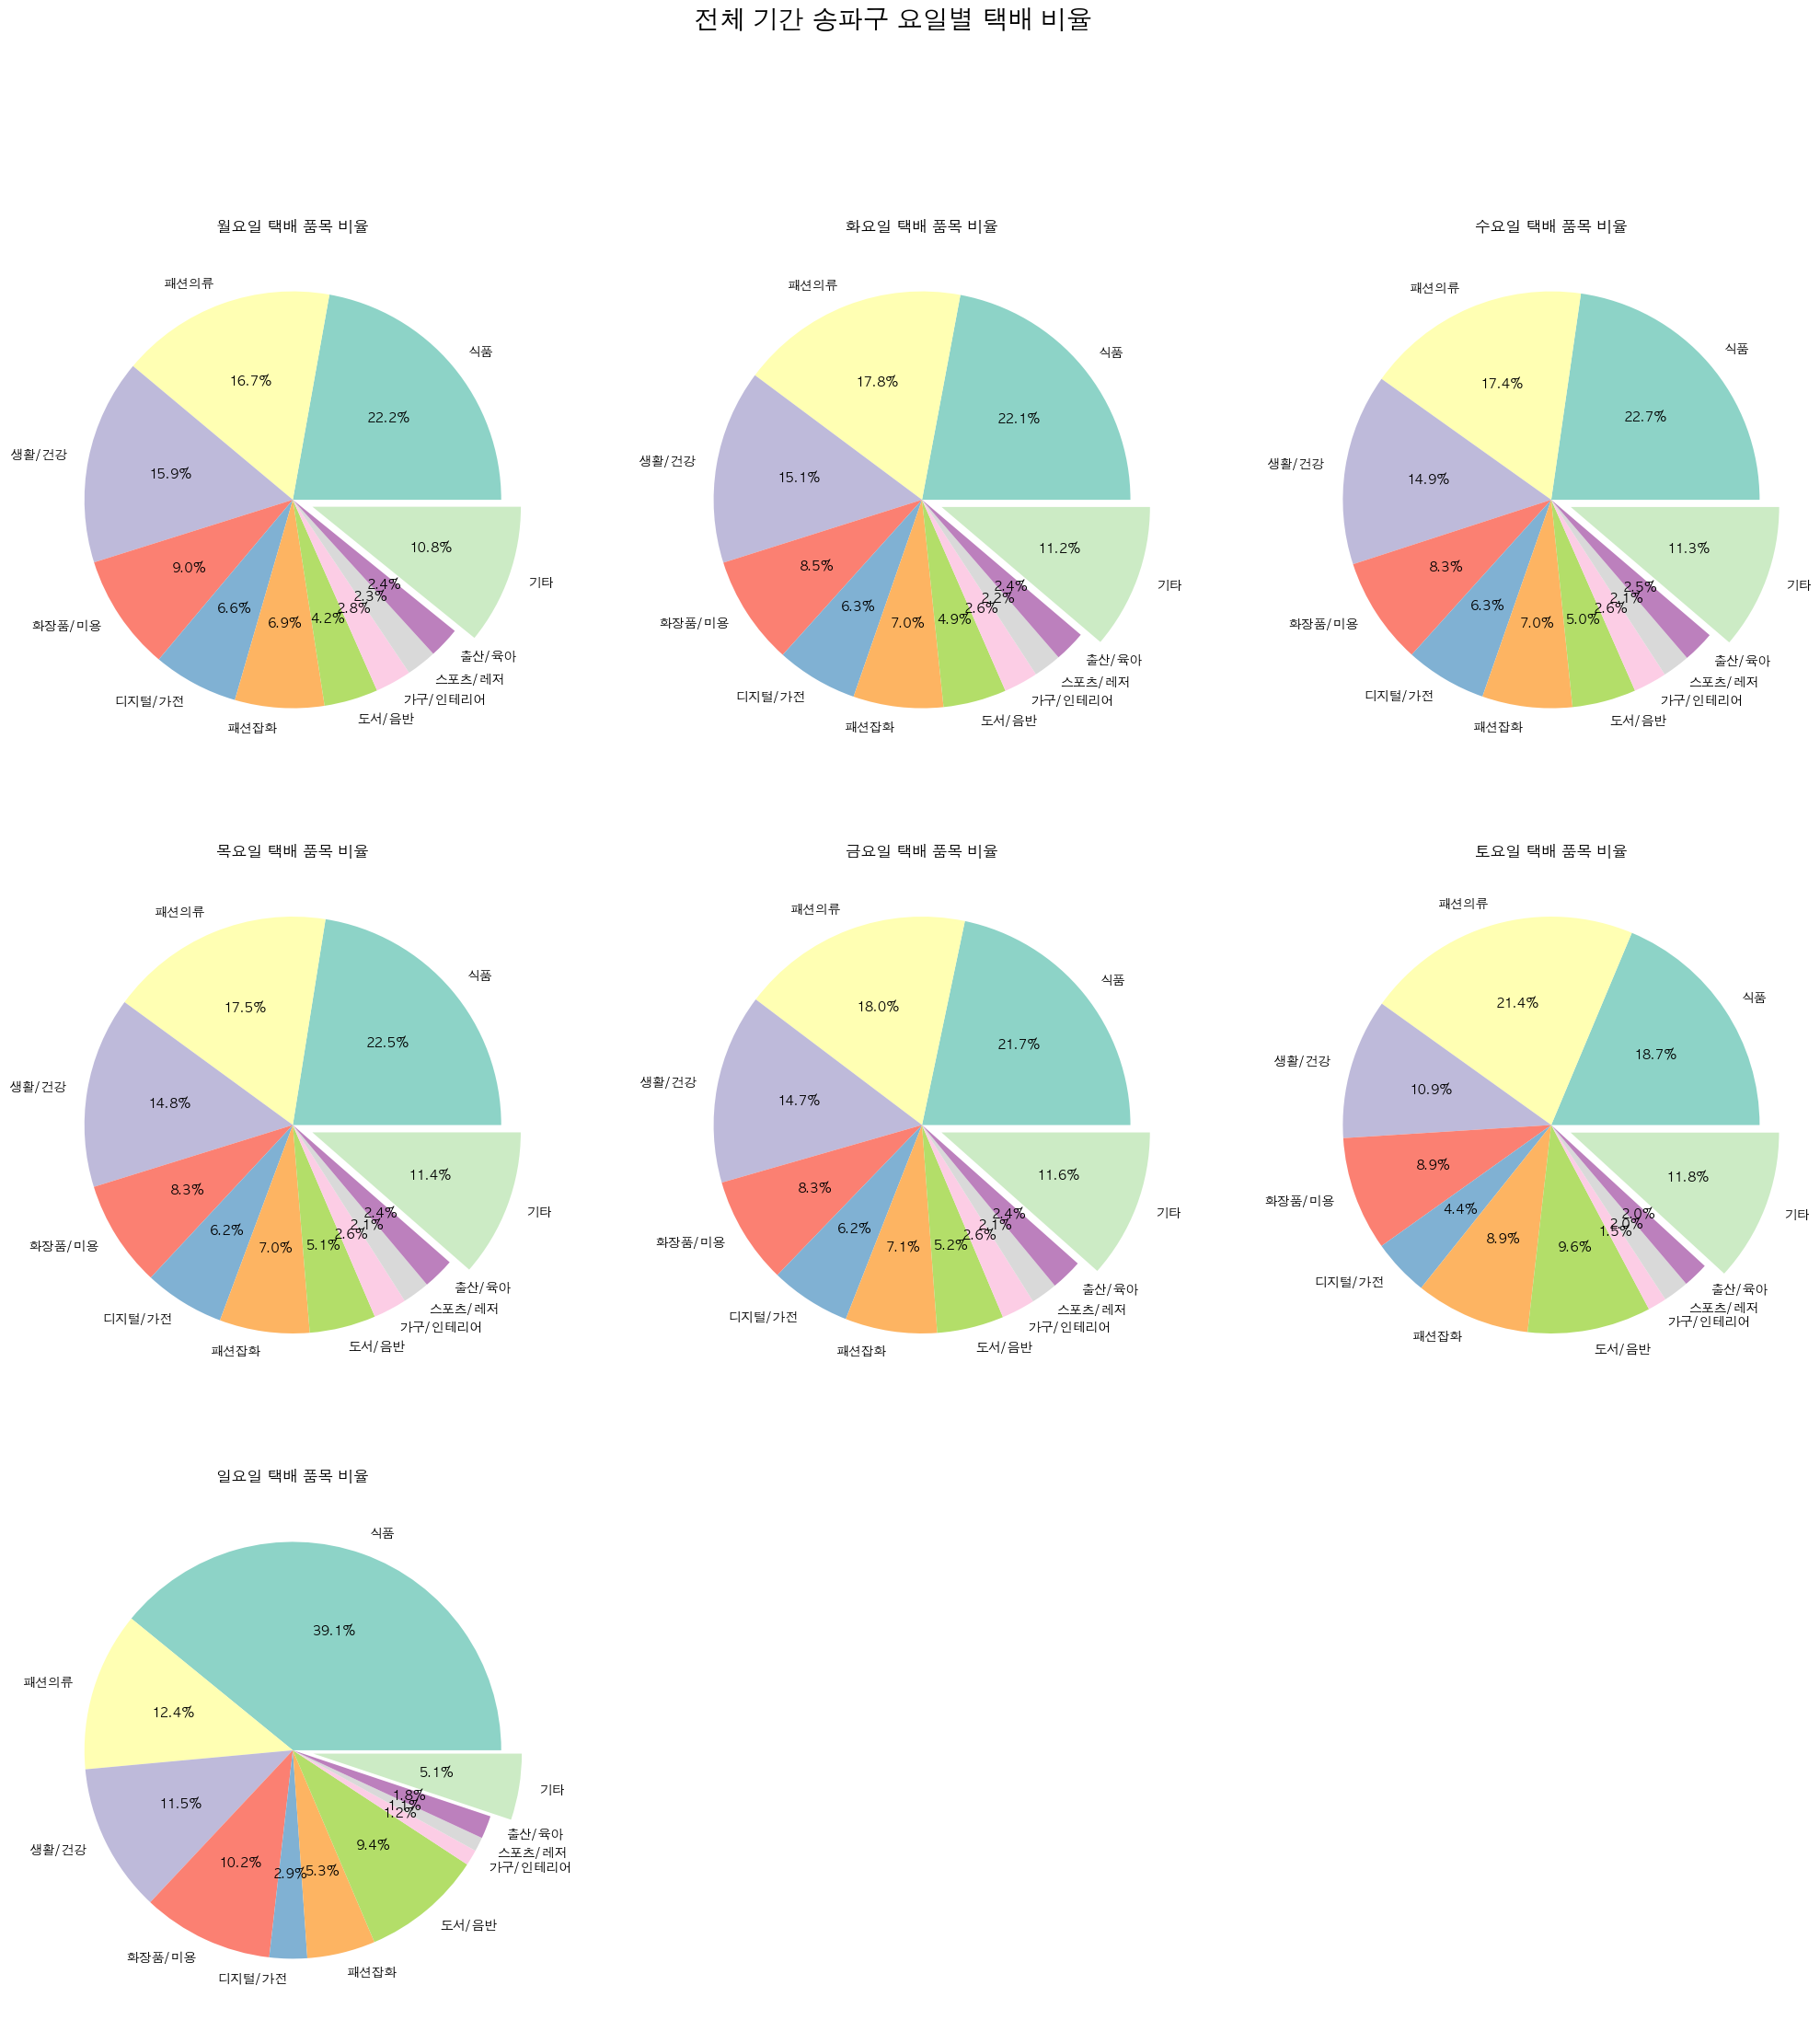

In [ ]:
day_pie("송파")

#### 강서구

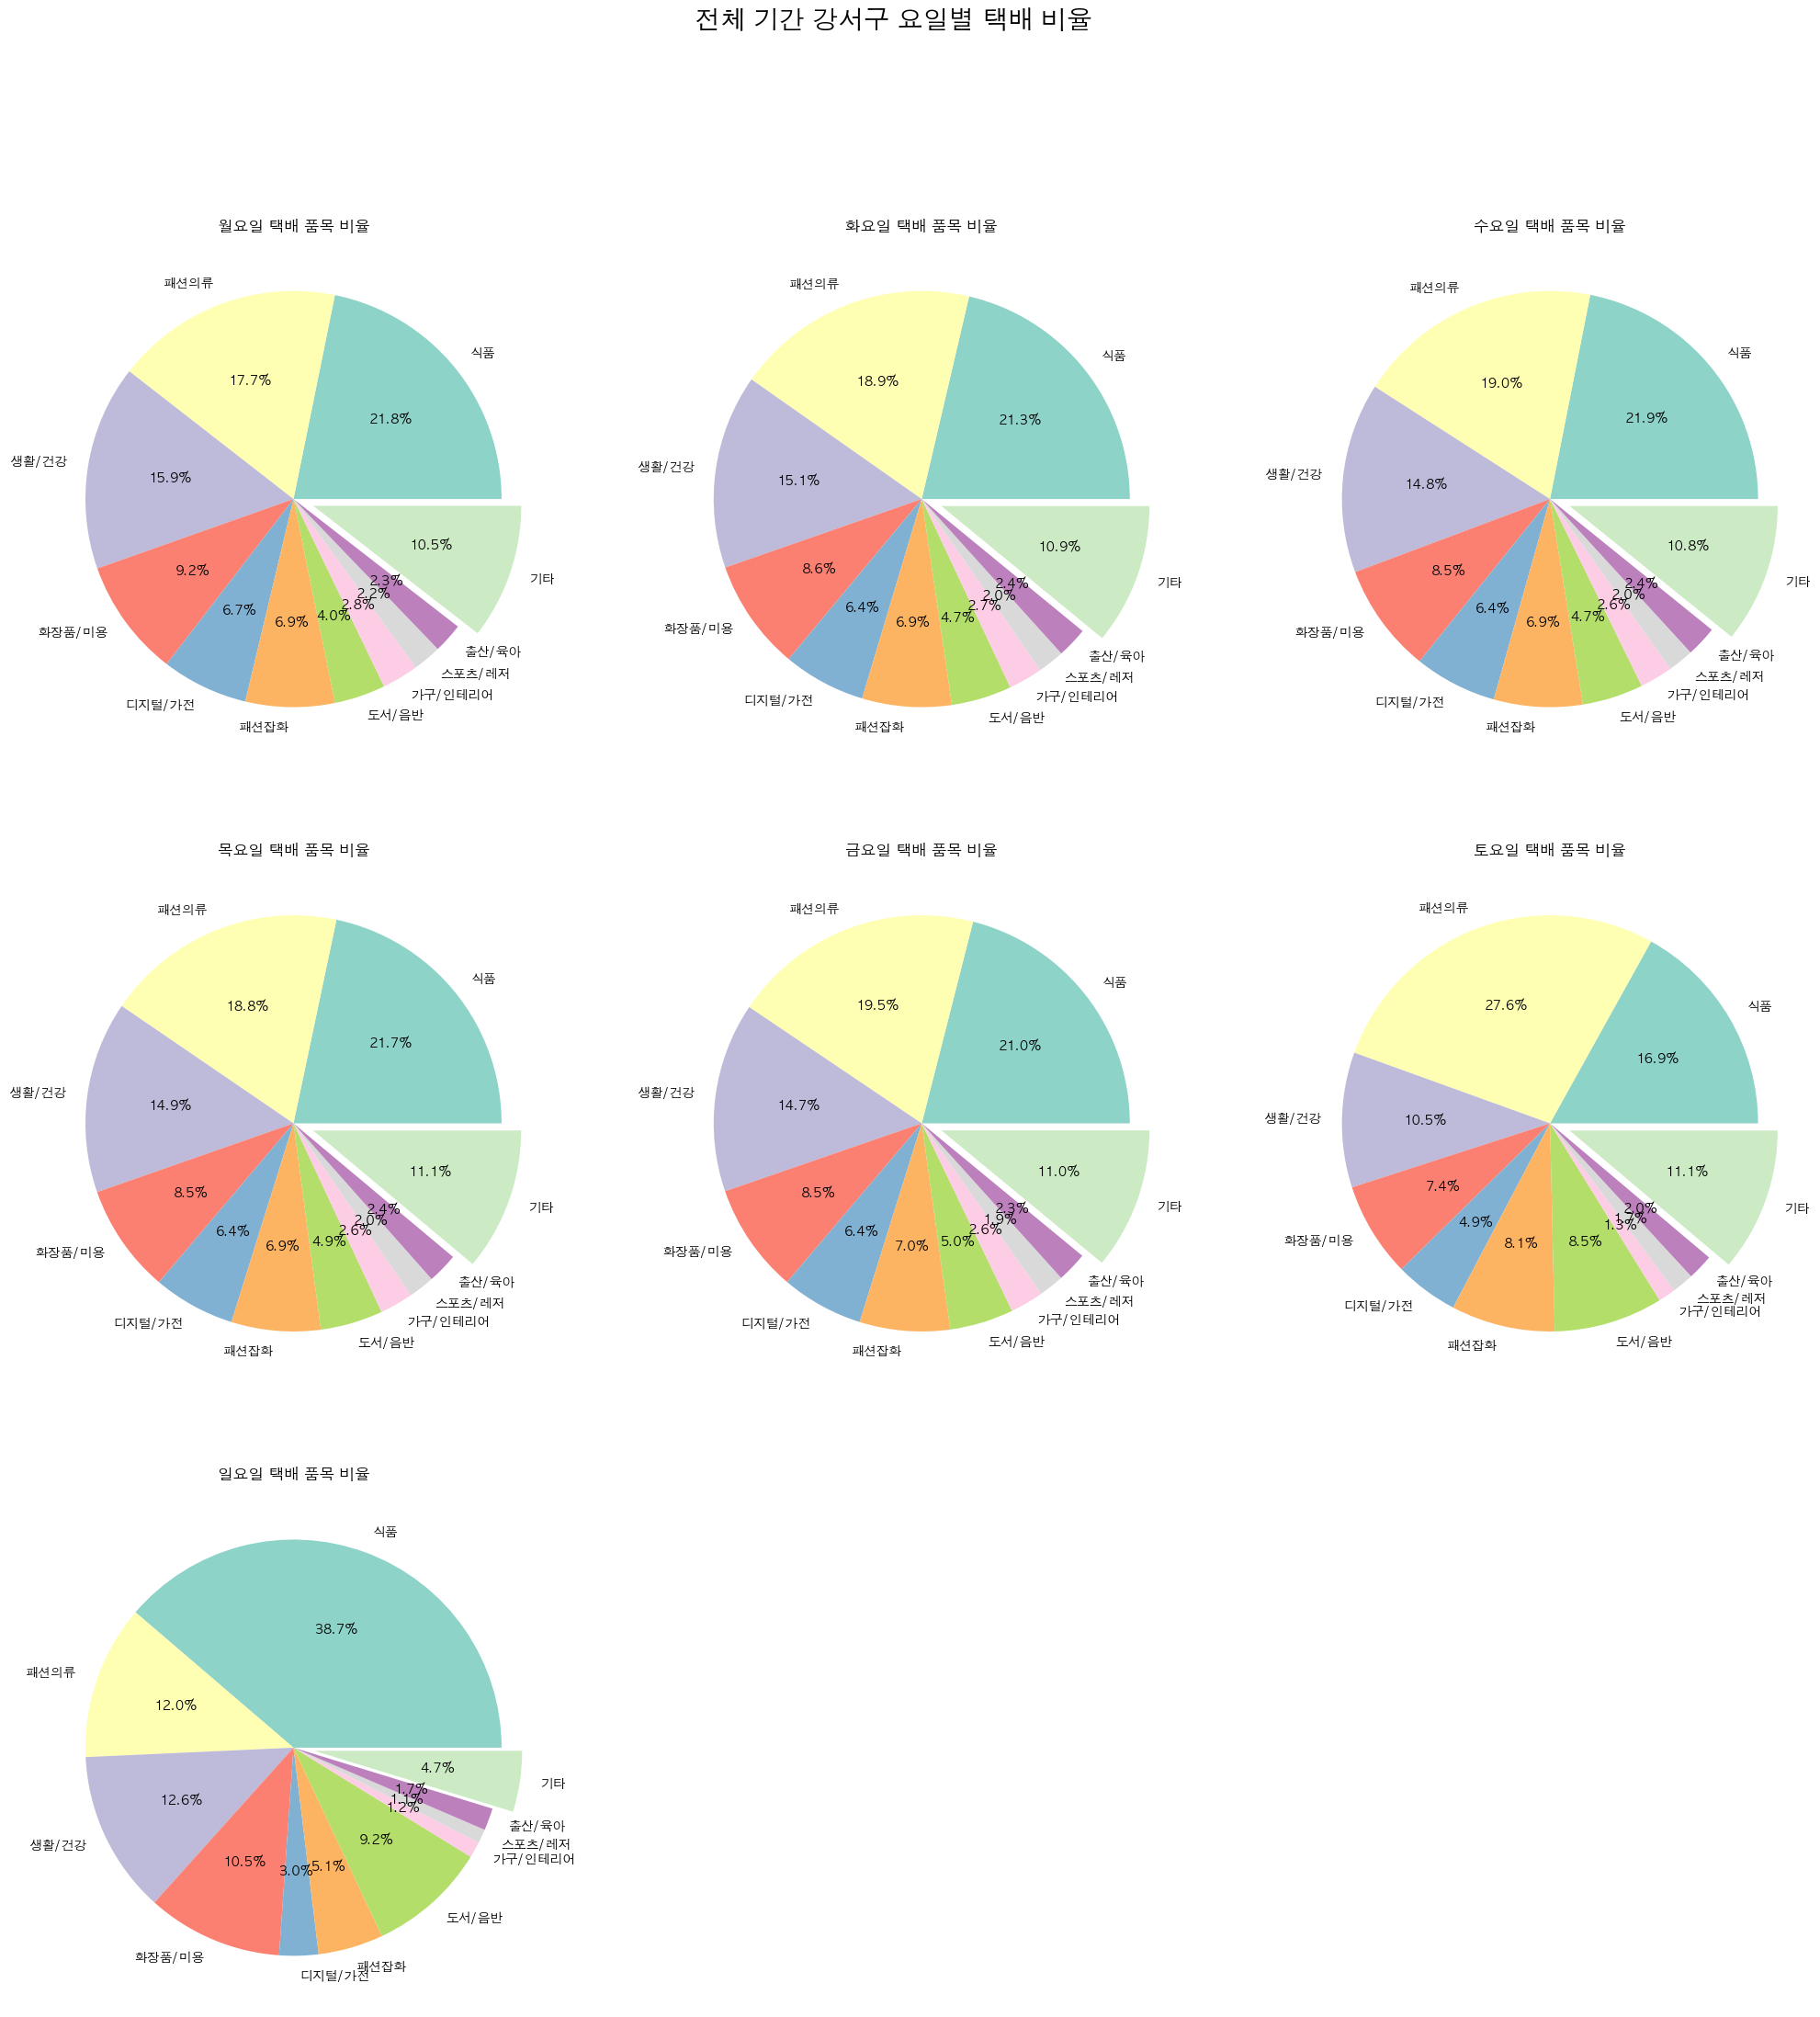

In [ ]:
day_pie("강서")

#### 서초구

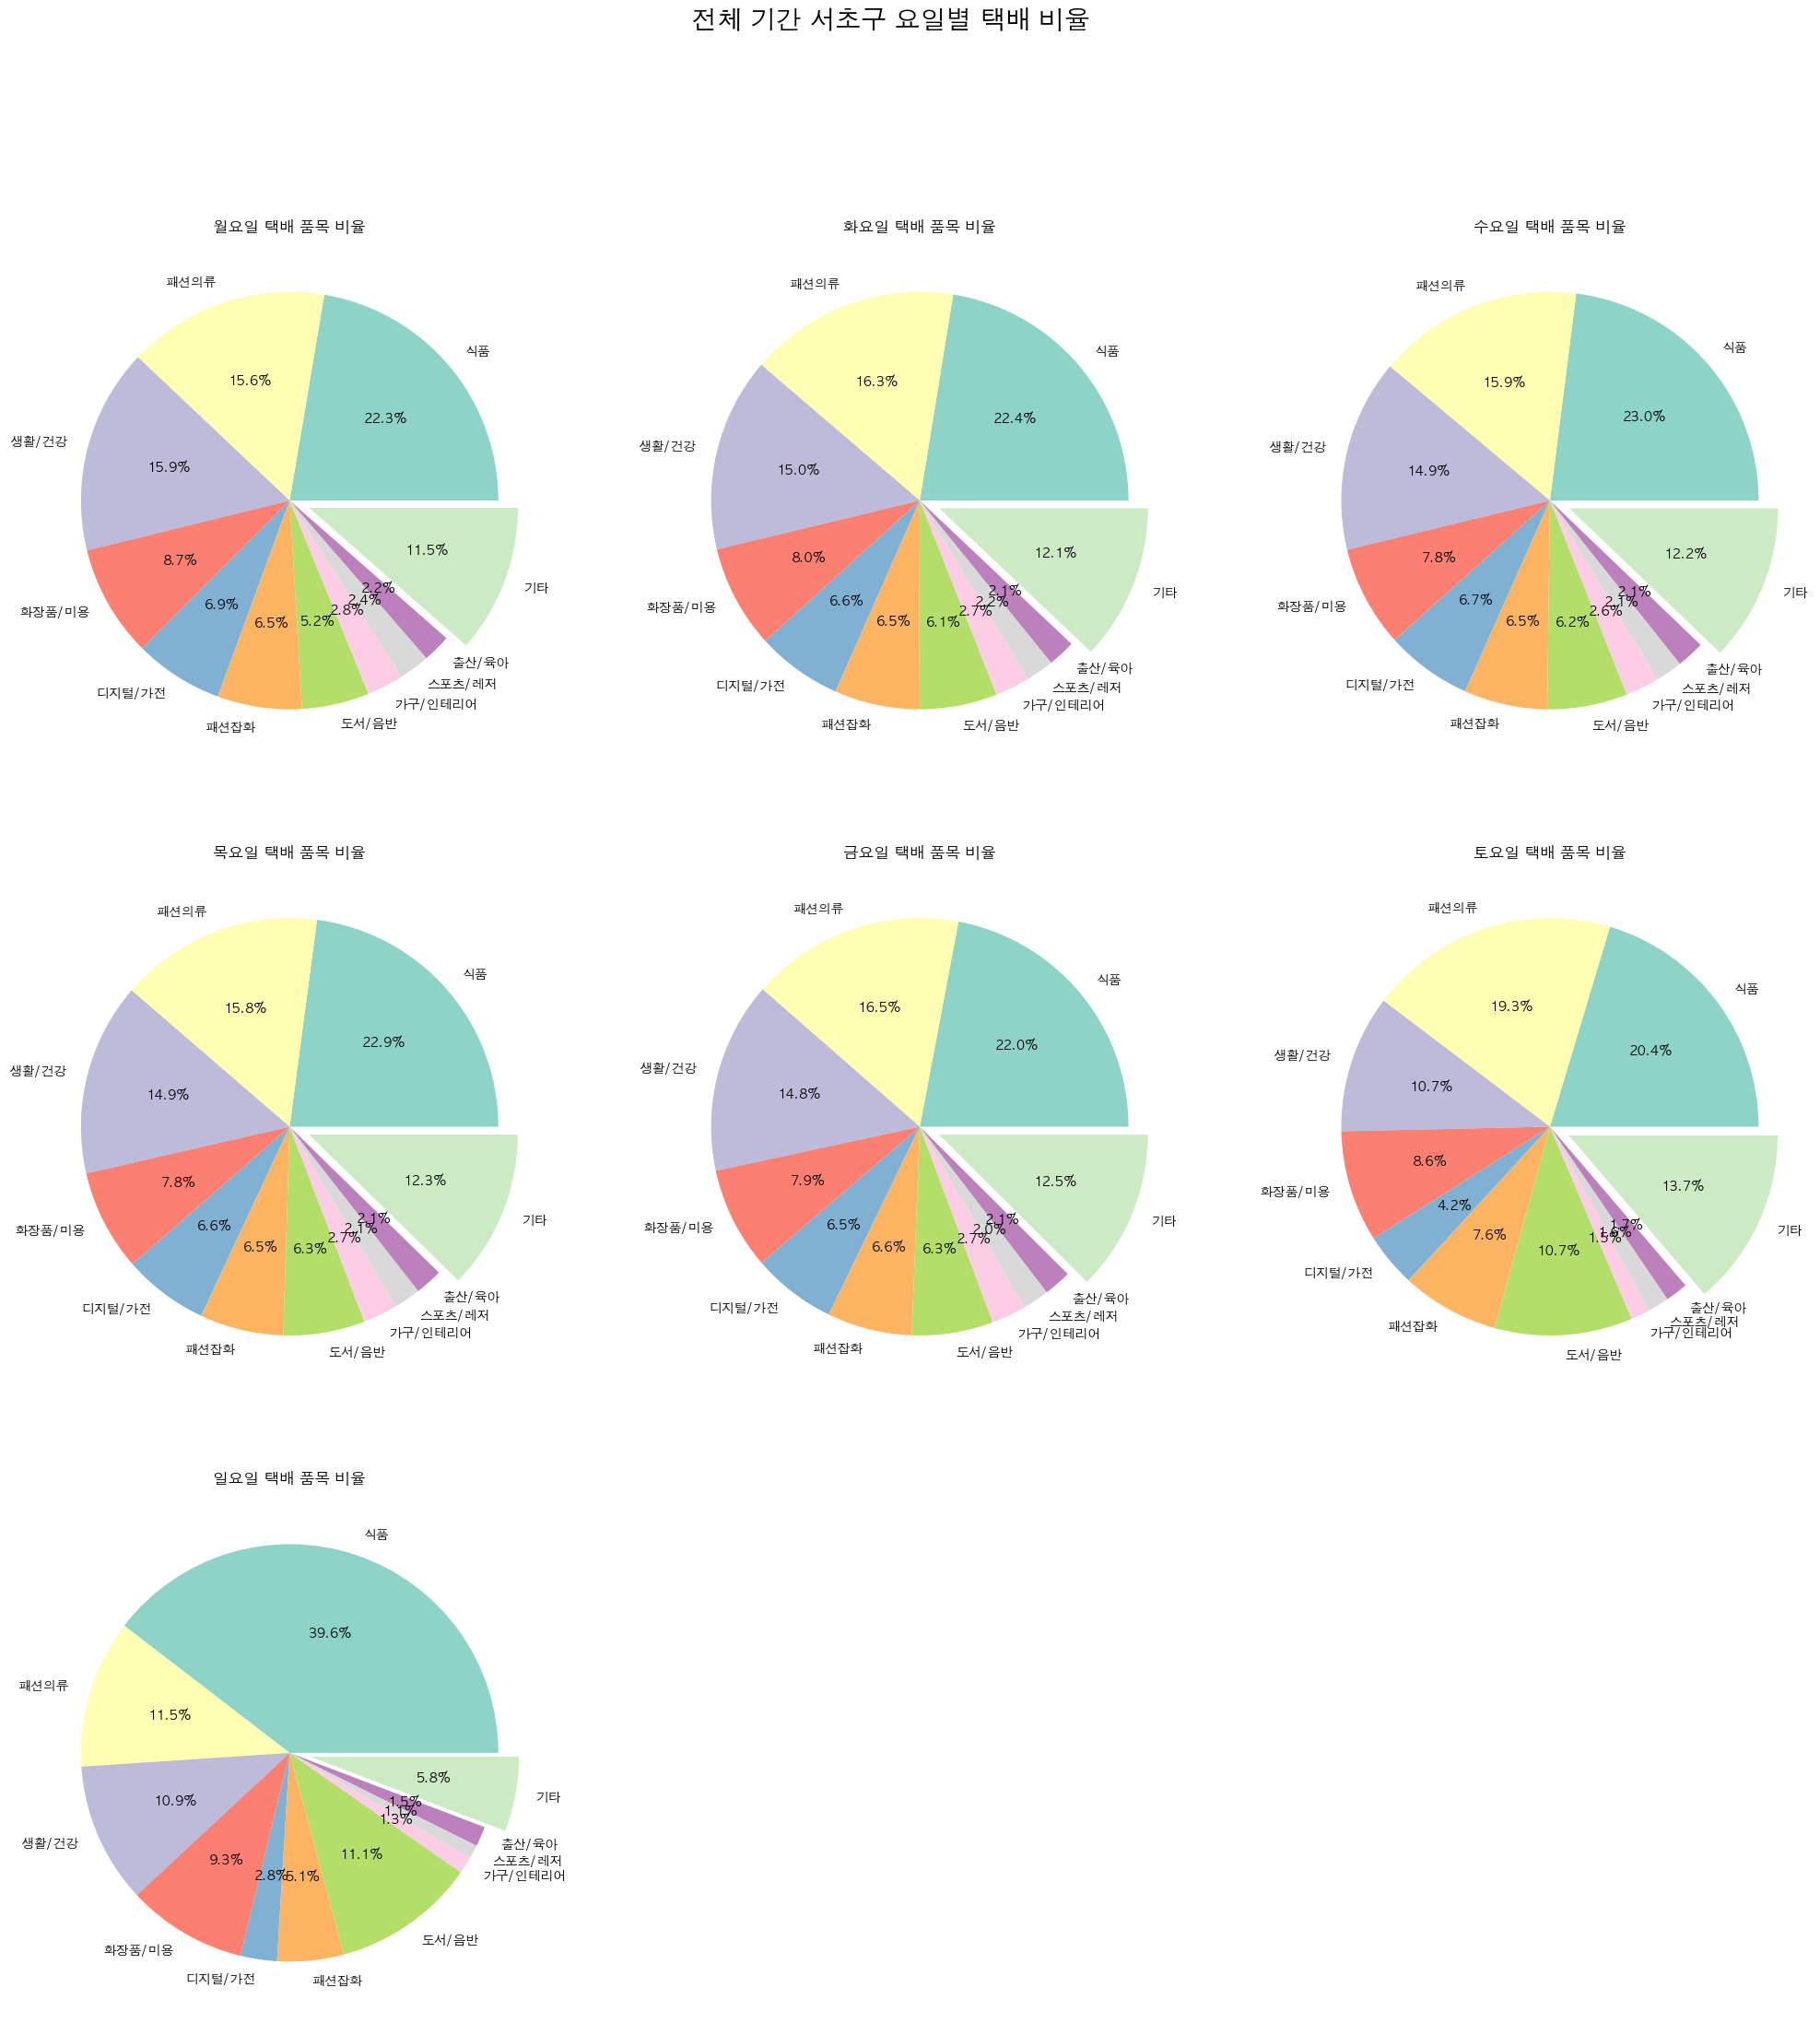

In [ ]:
day_pie("서초")